# Here we are predict the patient are skin diseases or not.

## Domain Analysis

* This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well.Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features.
*  Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.The names and id numbers of the patients were recently removed from the database.

In [29]:
import pandas as pd # use for data cleaning
import numpy as np # use for Numerical Function
import matplotlib.pyplot as plt # Use for Data visulization
import seaborn as sns # use for data visulization
import warnings # use for ignore the warnings
from statsmodels.tools.sm_exceptions import ValueWarning # use for ignore the value error
warnings.filterwarnings("ignore",category=ValueWarning)

In [30]:
pd.set_option("display.max_columns",None) # show the all columns

In [31]:
data = pd.read_csv("dataset_35_dermatology (1).csv") # load the dataset
data

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
0                             1                  0               0   
1                             1                  1               1   
2                             0                  0               0   
3                             3                  2               0   
4                             0                  0               0   
..                          ...                ...             ...   
361                           0                  0               0   
362                           0                  0               0   
363                           0                  0               0   
364                           0                  0               0   
365                           3                  3               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                       0                              0               0   
1                       0                              0               1   
2                       1                              0               0   
3                       0                              0               3   
4                       1                              0               0   
..                    ...                            ...             ...   
361                     0                              0               1   
362                     0                              0               0   
363                     2                              2               0   
364                     2                              0               0   
365                     0                              0               1   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                   0           3           2               0   
1                                   0           1           2               0   
2                                   0           1           2               0   
3                                   0           0           2               0   
4                                   0           1           2               0   
..                     

### Atribute Information:-

**erythema –** Redness of the skin, commonly due to increased blood flow.\
**scaling –** Flaking or shedding of the outer layer of the skin.\
**definite_borders –** Well-defined edges of the skin lesion.\
**itching –** Sensation that causes a desire to scratch.\
**koebner_phenomenon –** Skin lesions appearing on lines of trauma.\
**polygonal_papules –** Small, multi-sided raised lesions.\
**follicular_papules –** Papules originating around hair follicles.\
**oral_mucosal_involvement –** Lesions present inside the mouth.\
**knee_and_elbow_involvement –** Lesions on the knees and elbows.\
**scalp_involvement –** Lesions on the scalp.\
**family_history –** History of the condition in family members.\
**melanin_incontinence –** Loss of melanin from the epidermis, which gets trapped in the dermis\
**eosinophils_in_the_infiltrate –** Presence of eosinophils (a type of white blood cell) in skin infiltrates.\
**PNL_infiltrate –** Polymorphonuclear leukocyte infiltrate, a type of immune cell presence.\
**fibrosis_of_the_papillary_dermis –** Thickening or scarring of the upper dermal layer.\
**exocytosis –** Migration of inflammatory cells into the epidermis.\
**acanthosis –** Thickening of the skin’s epidermal layer.\
**hyperkeratosis –** Thickening of the outer layer of the skin.\
**parakeratosis –** Retention of nuclei in the outer skin layer, often a sign of rapid cell turnover.\
**clubbing_of_the_rete_ridges –** Bulging of the rete ridges, structures in the epidermis.\
**elongation_of_the_rete_ridges –** Lengthening of these structures in the epidermis.\
**thinning_of_the_suprapapillary_epidermis –** Thinning of the skin layer above the papillary dermis.\
**spongiform_pustule –** Fluid-filled pustules within the skin layers.\
**munro_microabcess –** Small abscesses in the skin's epidermal layer.\
**focal_hypergranulosis –** Increased granular layer in a focused area of the skin.\
**disappearance_of_the_granular_layer –** Loss of the granular layer, usually in areas of hyperkeratosis.\
**vacuolisation_and_damage_of_basal_layer –** Formation of vacuoles in, and damage to, the basal layer of the epidermis.\
**spongiosis –** Accumulation of fluid in the epidermis, often seen in eczema.\
**saw-tooth_appearance_of_retes –** Saw-tooth shape of rete ridges, a pattern seen in lichen planus.\
**follicular_horn_plug –** Hard keratin plug forming in a hair follicle.\
**perifollicular_parakeratosis –** Parakeratosis around hair follicles.\
**inflammatory_monoluclear_inflitrate –** Presence of mononuclear immune cells in the skin.\
**band-like_infiltrate –** Band-like distribution of immune cells within the skin.\
**Age –** Age of the patient.\
**class –** Target class variable for classification, which may correspond to the condition or disease type.

## Basic Check:-

In [32]:
data.head() # show top 5 dataset

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  family_history  \
0                           1                  0               0   
1                           1                  1               1   
2                           0                  0               0   
3                           3                  2               0   
4                           0                  0               0   

   melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                     0                              0               0   
1                     0                              0               1   
2                     1                              0               0   
3                     0                              0               3   
4                     1                              0               0   

   fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                 0           3           2               0   
1                                 0           1           2               0   
2                                 0           1           2               0   
3                                 0           0           2               0   
4                                 0           1           2               0   

   parakeratosis  clubbing_of_the_rete_ridges  elongation_of_the_rete_ridges  \
0              0                            0                              0   
1              2                            2                              2   
2              2                            0                              0   
3              3                            2                              2   
4              0                            0                              0   

   thinning_of_the_suprapapillary_epidermis  spongiform_pustule  \
0                                         0                   0   
1                                         2                   2   
2                                         0                   0   
3                                         2                   2   
4                                         0                   0   

   munro_microabcess  focal_hypergranulosis  \
0                  0                      0   
1                  1                      0   
2                  0                      2   
3                  0                      0   
4                  0                      2   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \

In [33]:
data.tail() # show bottom five 5 rows

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
361                           0                  0               0   
362                           0                  0               0   
363                           0                  0               0   
364                           0                  0               0   
365                           3                  3               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
361                     0                              0               1   
362                     0                              0               0   
363                     2                              2               0   
364                     2                              0               0   
365                     0                              0               1   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
361                                 0           1           1               0   
362                                 0           2           2               0   
363                                 0           3           3               0   
364                                 0           3           2               0   
365                                 0           0           2               0   

     parakeratosis  clubbing_of_the_rete_ridges  \
361              0                            0   
362              0                            0   
363              0                            0   
364              0                            0   
365              2                            3   

     elongation_of_the_rete_ridges  thinning_of_the_suprapapillary_epidermis  \
361                              0                                         0   
362                              0                                         0   
363                              0                                         0   
364                              0                                         0   
365                              2                                         3   

     spongiform_pustule  munro_microabcess  focal_hypergranulosis  \
361                   0                  0                      0   
362                   0                  0                      0   
363                   0                  0                      3   
364                   0                  0                      3   
365                   0                  2                      0   

     disappearance_of_the_granular_layer  \
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   


In [34]:
data.describe() # use for cehck numerical value of continous column

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  family_history  melanin_incontinence  \
count         366.000000      366.000000            366.000000   
mean            0.519126        0.125683              0.404372   
std             0.905639        0.331946              0.869818   
min             0.000000        0.000000              0.000000   
25%             0.000000        0.000000              0.000000   
50%             0.000000        0.000000              0.000000   
75%             1.000000        0.000000              0.000000   
max             3.000000        1.000000              3.000000   

       eosinophils_in_the_infiltrate  PNL_infiltrate  \
count                     366.000000      366.000000   
mean                        0.139344        0.546448   
std                         0.411790        0.815451   
min                         0.000000        0.000000   
25%                         0.000000        0.000000   
50%                         0.000000        0.000000   
75%                         0.000000        1.000000   
max                         2.000000        3.000000   

       fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  \
count                        366.000000  366.000000  366.000000   
mean                           0.336066    1.368852    1.956284   
std                            0.853139    1.104418    0.712512   
min                            0.000000    0.000000    0.000000   
25%                            0.000000    0.000000    2.000000   
50%                            0.000000    2.000000    2.000000   
75%                            0.000000    2.000000    2.000000   
max                            3.000000    3.000000    3.000000   

       hyperkeratosis  parakeratosis  clubbing_of_the_rete_ridges  \
count      366.000000     366.000000                   366.000000   
mean         0.527322       1.289617                     0.663934   
std          0.757116       0.917562                     1.056829   
min          0.000000       0.000000                     0.000000   
25%          0.000000       1.000000                     0.000000   
50%          0.000000       1.000000                     0.000000   
75%          1.000000       2.000000                     2.000000   
max 

* Here not see the any null value in any columns.
* Not see the any column std is 1 because one meanse this column inside only one unique value to after this column is drop.

In [35]:
data.describe(include="O") # use for check numerical value of categorical column

Age
count   366
unique   61
top      40
freq     17

* Here Age is dtype is object but real type is int to change it.

In [36]:
data.info() # show the Datasetr information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

**Insights:-**
* Here total data is 366 rows and 35 columns
* Here total 34 int64 columns and 1 object type column and total memorry store is 100.2 kb.
* Here not see the any null value in any columns. 

## EDA:- Exploratory Data Analysis

* EDA :- EDA involves analyzing and visualizing data to understand its key characteristics, uncover patterns, and identify relationships between variables. It helps you get a better understanding of your data before diving into complex modeling or analysis techniques.

In [37]:
for column in data: # store the column
    print(column)

erythema
scaling
definite_borders
itching
koebner_phenomenon
polygonal_papules
follicular_papules
oral_mucosal_involvement
knee_and_elbow_involvement
scalp_involvement
family_history
melanin_incontinence
eosinophils_in_the_infiltrate
PNL_infiltrate
fibrosis_of_the_papillary_dermis
exocytosis
acanthosis
hyperkeratosis
parakeratosis
clubbing_of_the_rete_ridges
elongation_of_the_rete_ridges
thinning_of_the_suprapapillary_epidermis
spongiform_pustule
munro_microabcess
focal_hypergranulosis
disappearance_of_the_granular_layer
vacuolisation_and_damage_of_basal_layer
spongiosis
saw-tooth_appearance_of_retes
follicular_horn_plug
perifollicular_parakeratosis
inflammatory_monoluclear_inflitrate
band-like_infiltrate
Age
class


### Univariant Analysis

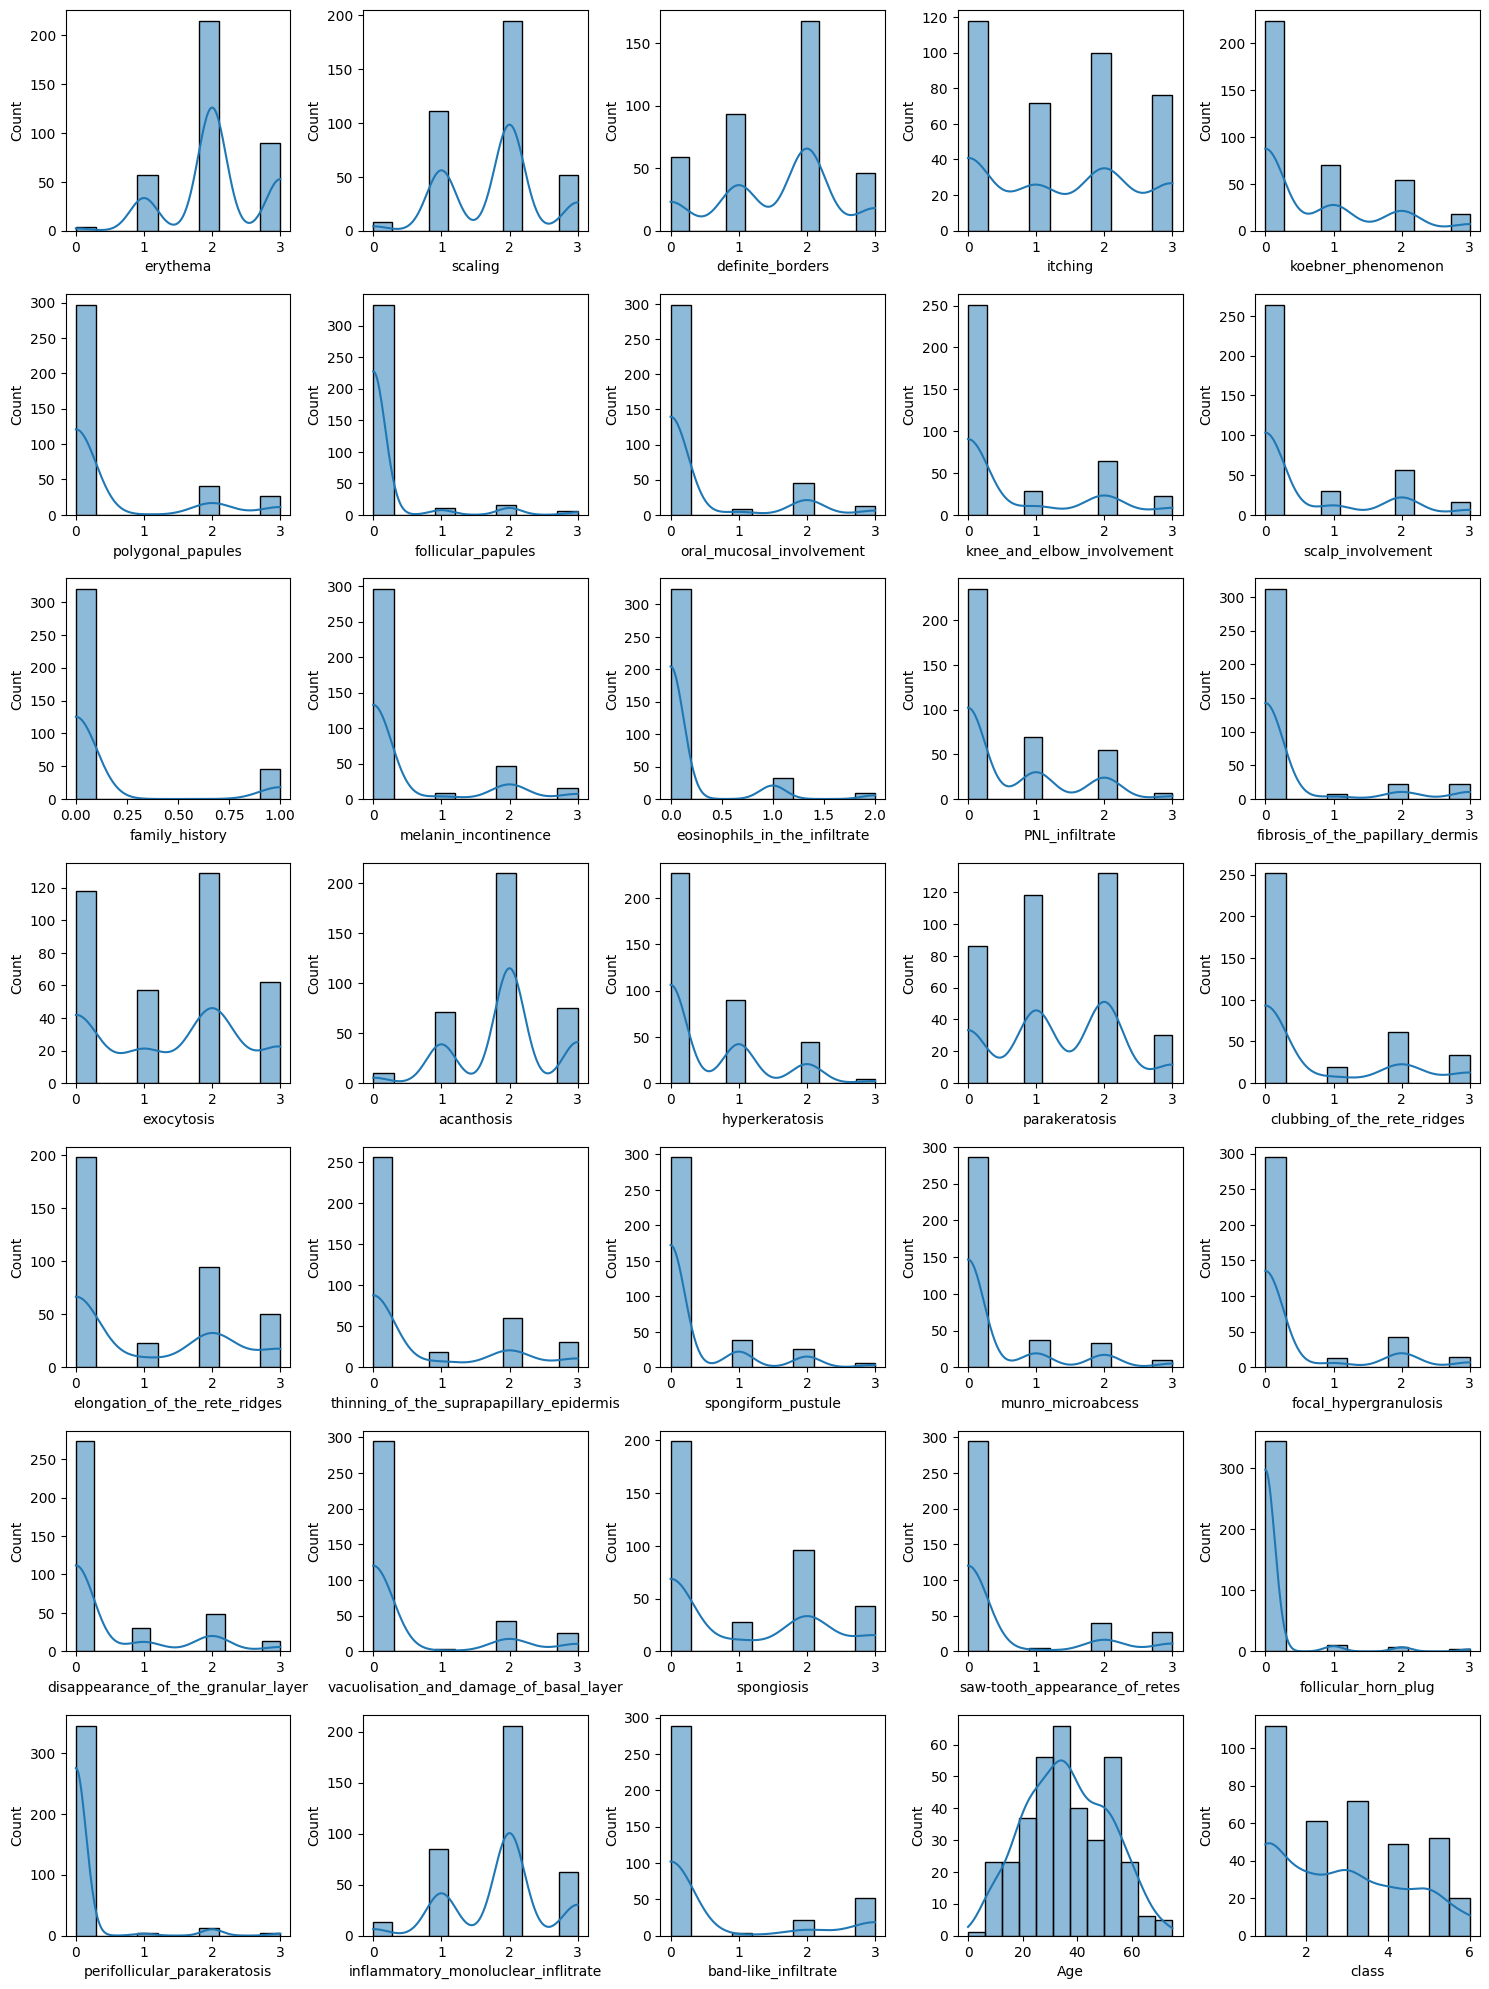

In [694]:
plt.figure(figsize=(15,20))
plt_num = 1
for column in data:
    if plt_num <= 35:
        plt.subplot(7,5,plt_num)
        sns.histplot(data[column],kde=True) # use the histplot for numerical columns
        plt.xlabel(column,fontsize = 10)
    plt_num += 1
plt.tight_layout()

* Age column follow the noraml distribution

### Biavarinat Analysis

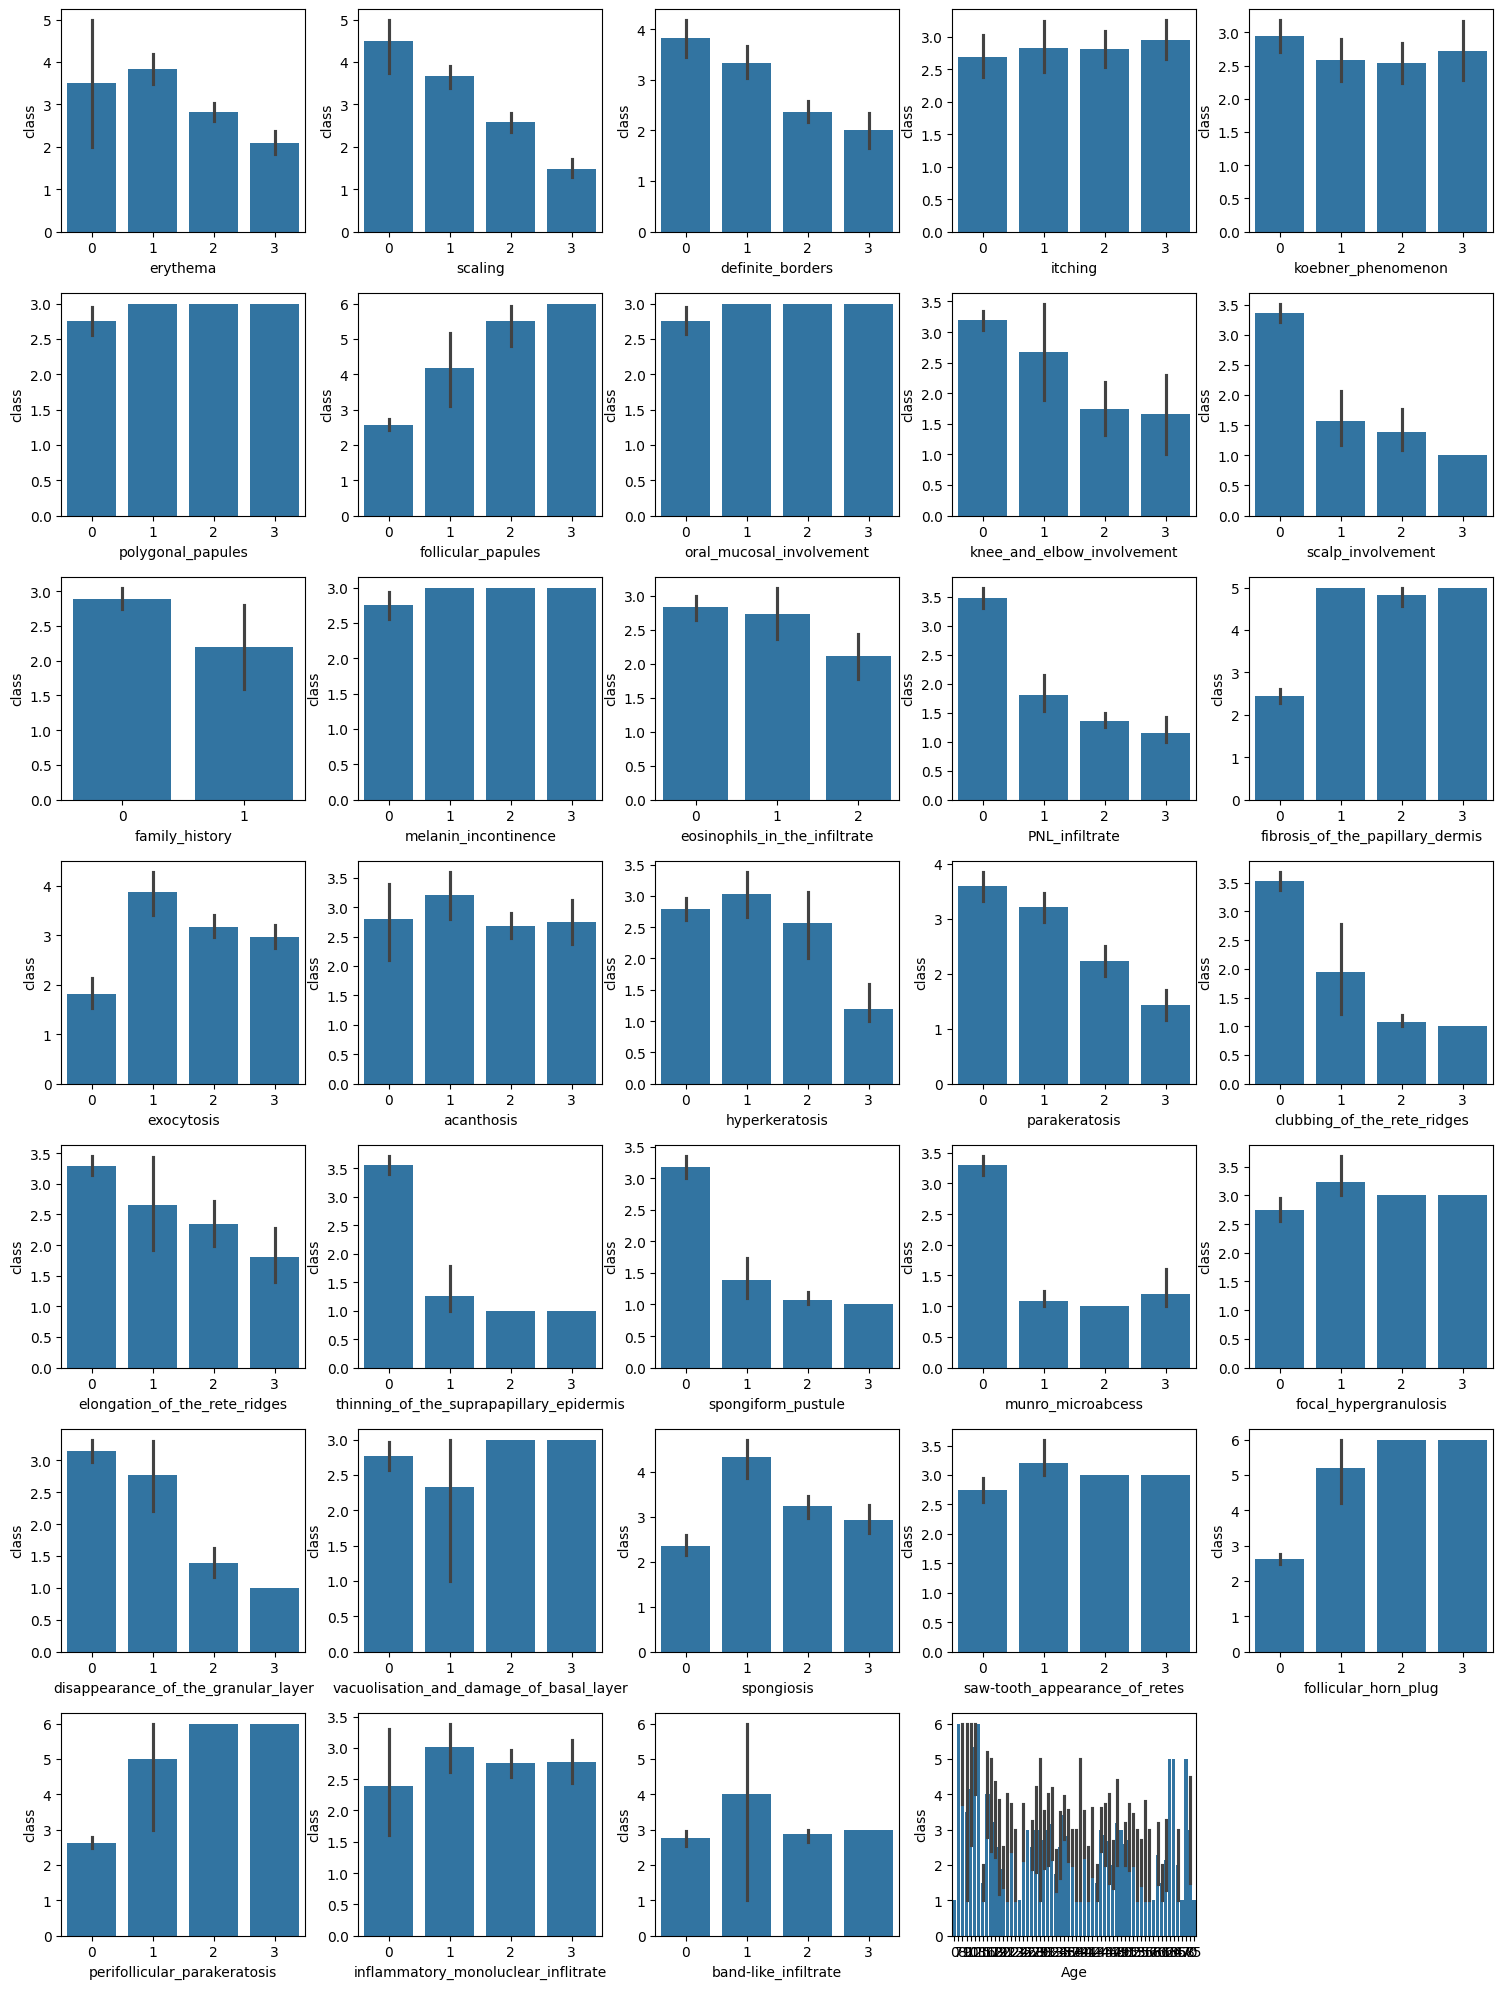

In [695]:
plt.figure(figsize=(15,20))
plt_num = 1
for column in data:
    if plt_num <= 34:
        plt.subplot(7,5,plt_num)
        sns.barplot(x = data[column],y = data["class"]) # use the barplot categorical columns
        plt.xlabel(column,fontsize = 10)
    plt_num += 1
plt.tight_layout()

* Here Erythems one is high and family_history is not high.

### Multivariant Analysis

In [696]:
sns.pairplot(data) # use for all column compare with other columns

* Here not visulize this dataset

## Feature Engineering

* Feature Engineering is the process of selecting, transforming, and combining raw data into features that can be used to train machine learning models. It's a crucial step in the machine learning pipeline as it directly impacts the performance of the model. 

### 1. Data Preprocessing

* Data Preprocessing is the process of cleaning and transforming raw data into a suitable format for analysis. 1  It's a crucial step in any data analysis or machine learning project, as it significantly impacts the quality and accuracy of the results. 2 

In [38]:
data.Age.value_counts() # count the age values count

Age
40    17
50    17
36    16
27    16
22    15
      ..
58     1
49     1
63     1
68     1
75     1
Name: count, Length: 61, dtype: int64

In [39]:
data.loc[data["Age"] == "?","Age"] = np.nan # check the null values in Age columns

In [40]:
data.isnull().sum() # check the null values

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [41]:
data.Age.median() # find the median of age column

35.0

In [42]:
data.loc[data["Age"].isnull(),"Age"] = 35.0 # handle the age columns

In [43]:
data["Age"] = data["Age"].astype("int64") # change the data type of age column

In [44]:
data.isnull().sum() # handle the null value after check the null value

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [45]:
data.info() # check the change the datatype of age column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   erythema                                  366 non-null    int64
 1   scaling                                   366 non-null    int64
 2   definite_borders                          366 non-null    int64
 3   itching                                   366 non-null    int64
 4   koebner_phenomenon                        366 non-null    int64
 5   polygonal_papules                         366 non-null    int64
 6   follicular_papules                        366 non-null    int64
 7   oral_mucosal_involvement                  366 non-null    int64
 8   knee_and_elbow_involvement                366 non-null    int64
 9   scalp_involvement                         366 non-null    int64
 10  family_history                            366 non-null    int6

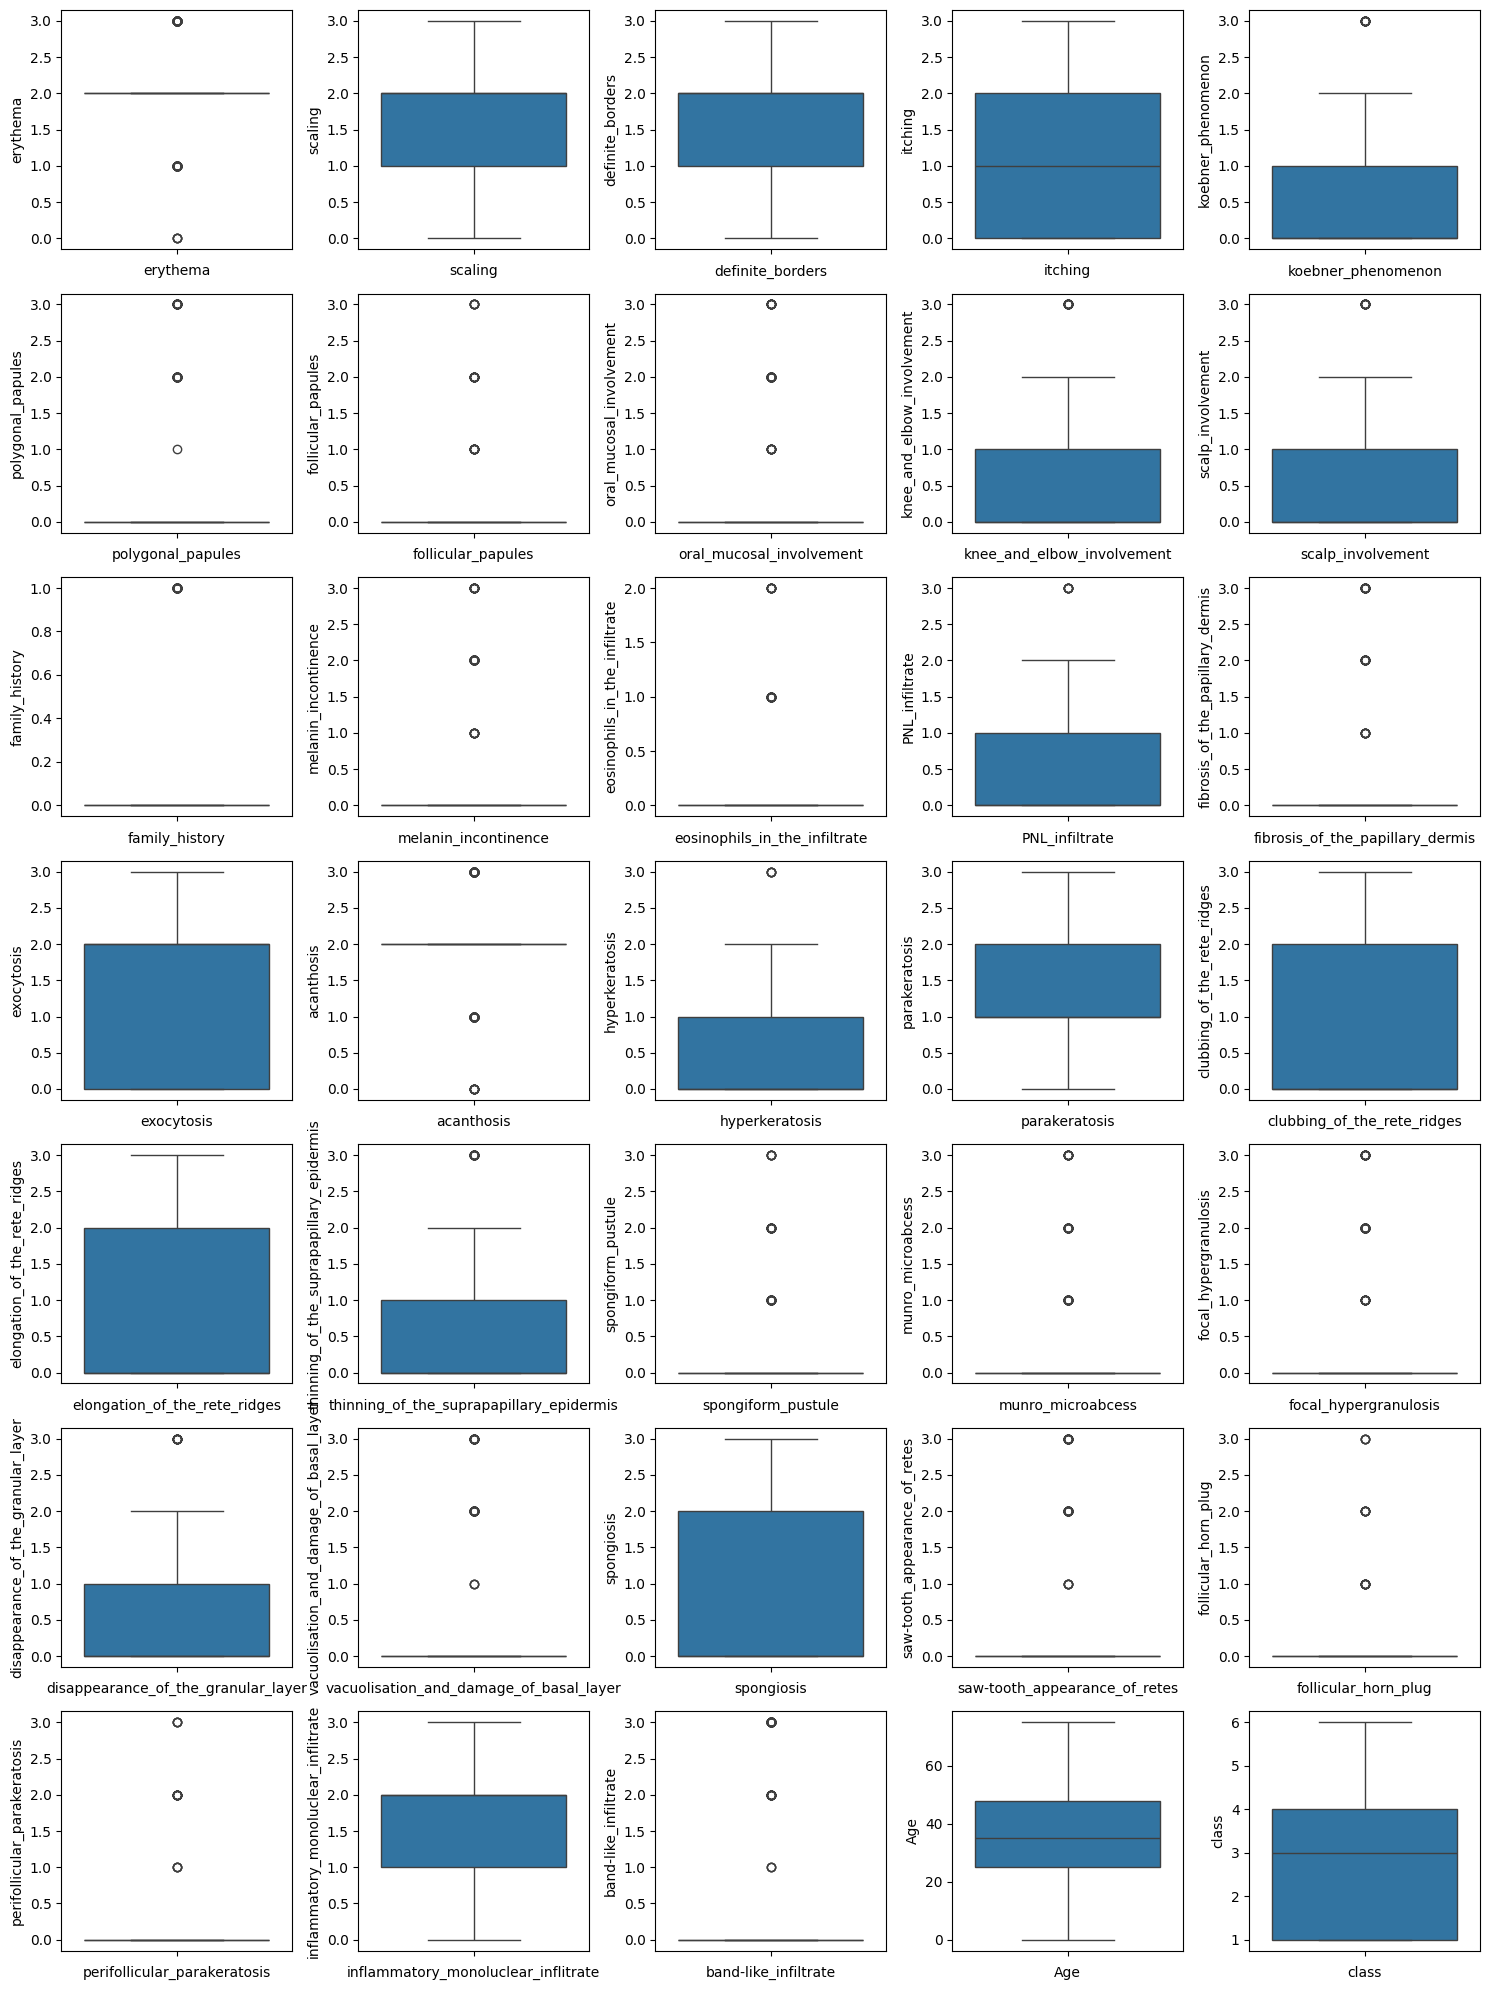

In [697]:
plt.figure(figsize=(15,20))
plt_num = 1
for column in data:
    if plt_num <= 35:
        plt.subplot(7,5,plt_num)
        sns.boxplot(data[column]) # use for check the outliers 
        plt.xlabel(column,fontsize = 10)
    plt_num += 1
plt.tight_layout()

In [46]:
data.head() # show the top 5 data rows

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  family_history  \
0                           1                  0               0   
1                           1                  1               1   
2                           0                  0               0   
3                           3                  2               0   
4                           0                  0               0   

   melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                     0                              0               0   
1                     0                              0               1   
2                     1                              0               0   
3                     0                              0               3   
4                     1                              0               0   

   fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                 0           3           2               0   
1                                 0           1           2               0   
2                                 0           1           2               0   
3                                 0           0           2               0   
4                                 0           1           2               0   

   parakeratosis  clubbing_of_the_rete_ridges  elongation_of_the_rete_ridges  \
0              0                            0                              0   
1              2                            2                              2   
2              2                            0                              0   
3              3                            2                              2   
4              0                            0                              0   

   thinning_of_the_suprapapillary_epidermis  spongiform_pustule  \
0                                         0                   0   
1                                         2                   2   
2                                         0                   0   
3                                         2                   2   
4                                         0                   0   

   munro_microabcess  focal_hypergranulosis  \
0                  0                      0   
1                  1                      0   
2                  0                      2   
3                  0                      0   
4                  0                      2   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \

### 2. Feature Selection

* Feature Selection is the process of selecting a subset of relevant features from the original feature set to improve the performance of a machine learning model.

<Axes: >

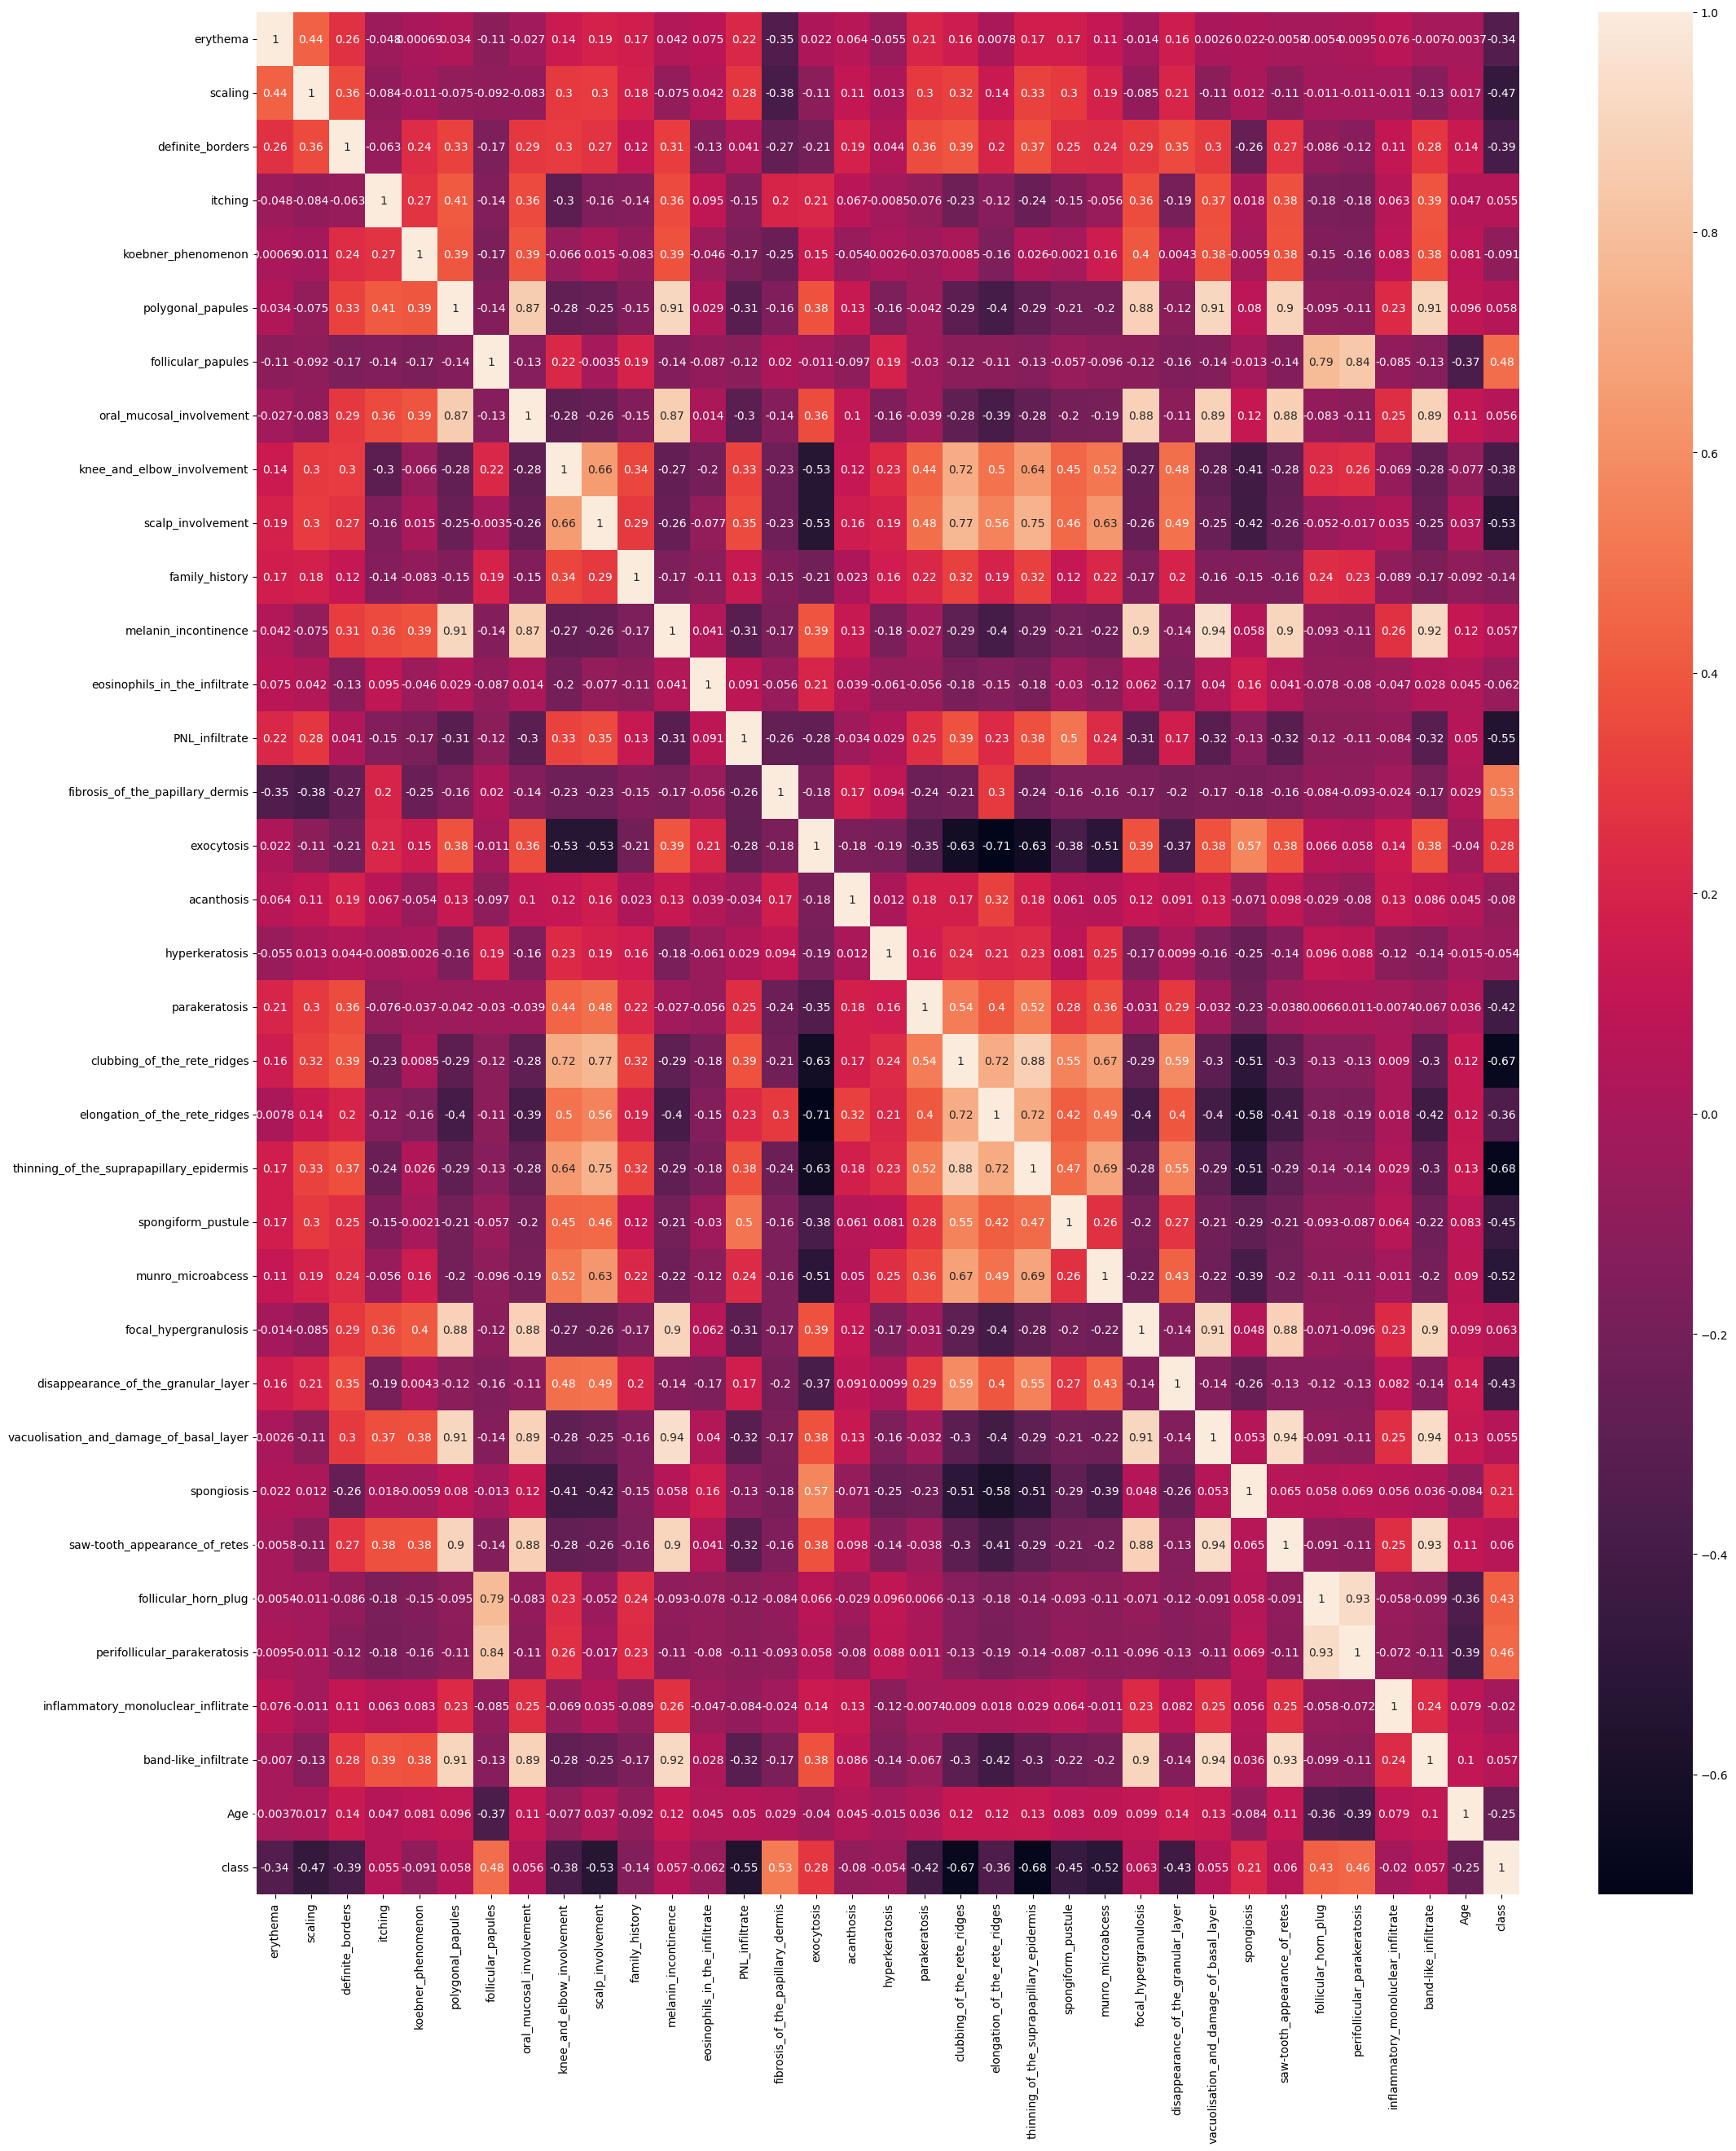

In [47]:
plt.figure(figsize=(25,30)) # use heatmap check the corelation
sns.heatmap(data.corr(),annot=True)

In [48]:
data.columns # check the columns names

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [49]:
# drop the columns 
data1 = data.drop(["melanin_incontinence","vacuolisation_and_damage_of_basal_layer","band-like_infiltrate","polygonal_papules",
                   "focal_hypergranulosis","saw-tooth_appearance_of_retes","perifollicular_parakeratosis"],axis=1)
data1

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     follicular_papules  oral_mucosal_involvement  knee_and_elbow_involvement  \
0                     0                         0                           1   
1                     0                         0                           1   
2                     0                         3                           0   
3                     0                         0                           3   
4                     0                         2                           0   
..                  ...                       ...                         ...   
361                   0                         0                           0   
362                   0                         0                           0   
363                   0                         2                           0   
364                   0                         2                           0   
365                   0                         0                           3   

     scalp_involvement  family_history  eosinophils_in_the_infiltrate  \
0                    0               0                              0   
1                    1               1                              0   
2                    0               0                              0   
3                    2               0                              0   
4                    0               0                              0   
..                 ...             ...                            ...   
361                  0               0                              0   
362                  0               0                              0   
363                  0               0                              2   
364                  0               0                              0   
365                  3               0                              0   

     PNL_infiltrate  fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  \
0                 0                                 0           3           2   
1                 1                                 0           1           2   
2                 0                                 0           1           2   
3                 3                                 0           0           2   
4                 0                                 0           1           2   
..              ...                               ...         ...         ...   
361               1                                 0           1           1   
362               0                                 0           2           2   
363               0                                 0           3           3   
364               0                                 0           3           2   
365               1                                 0           0           2   

     hyperkeratosis  parakeratosis  clubbing_of_the_rete_ridges  \
0                 0              0                            0   
1                 0              2                            2   
2                 0              2                            0   
3                 0              3   

<Axes: >

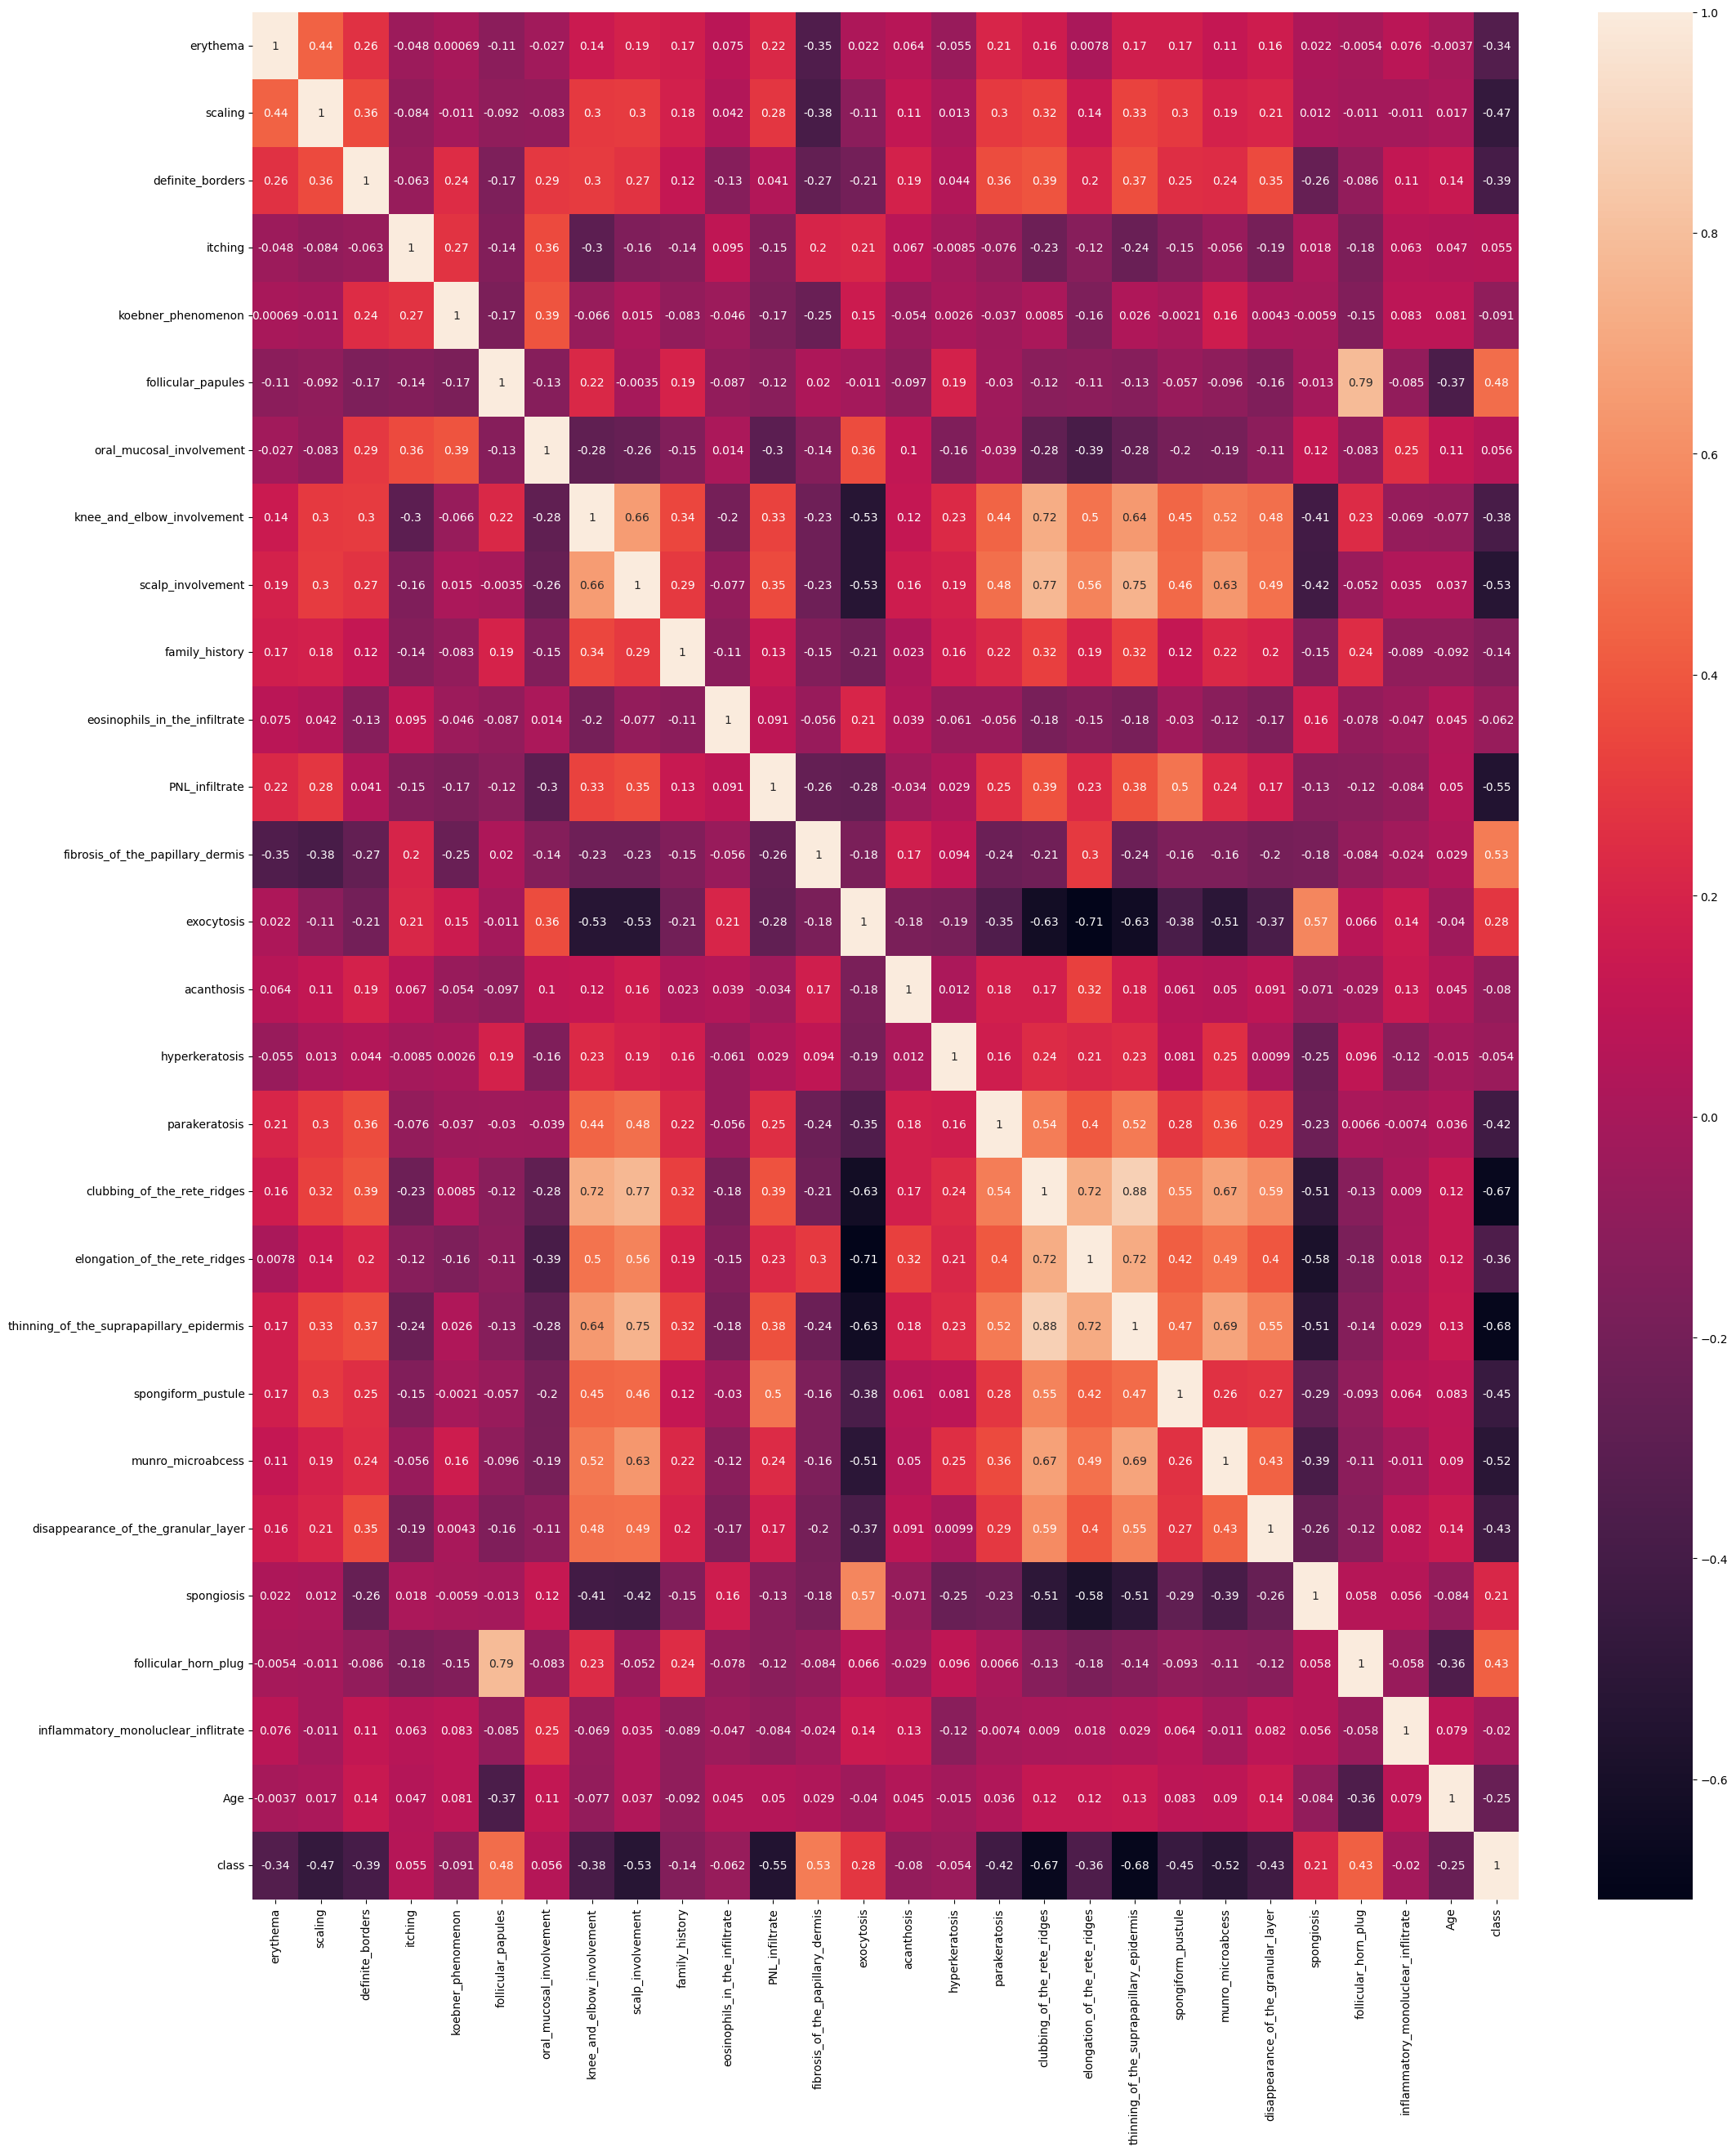

In [50]:
plt.figure(figsize=(25,30)) # use for check the corelation between independent columns and dependent columns
sns.heatmap(data1.corr(),annot=True)

## Model Selection

In [51]:
# create the independent and dependent variables
x = data1.drop("class",axis=1) 
y = data1["class"]

In [52]:
x

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     follicular_papules  oral_mucosal_involvement  knee_and_elbow_involvement  \
0                     0                         0                           1   
1                     0                         0                           1   
2                     0                         3                           0   
3                     0                         0                           3   
4                     0                         2                           0   
..                  ...                       ...                         ...   
361                   0                         0                           0   
362                   0                         0                           0   
363                   0                         2                           0   
364                   0                         2                           0   
365                   0                         0                           3   

     scalp_involvement  family_history  eosinophils_in_the_infiltrate  \
0                    0               0                              0   
1                    1               1                              0   
2                    0               0                              0   
3                    2               0                              0   
4                    0               0                              0   
..                 ...             ...                            ...   
361                  0               0                              0   
362                  0               0                              0   
363                  0               0                              2   
364                  0               0                              0   
365                  3               0                              0   

     PNL_infiltrate  fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  \
0                 0                                 0           3           2   
1                 1                                 0           1           2   
2                 0                                 0           1           2   
3                 3                                 0           0           2   
4                 0                                 0           1           2   
..              ...                               ...         ...         ...   
361               1                                 0           1           1   
362               0                                 0           2           2   
363               0                                 0           3           3   
364               0                                 0           3           2   
365               1                                 0           0           2   

     hyperkeratosis  parakeratosis  clubbing_of_the_rete_ridges  \
0                 0              0                            0   
1                 0              2                            2   
2                 0              2                            0   
3                 0              3   

In [53]:
y

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 366, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split # split the data traning and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [55]:
x_train

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
63          3        3                 2        1                   1   
241         2        2                 2        3                   0   
306         2        1                 1        0                   1   
317         2        2                 2        0                   1   
245         3        3                 3        0                   0   
..        ...      ...               ...      ...                 ...   
323         2        3                 3        0                   0   
192         3        2                 2        2                   0   
117         2        2                 3        2                   2   
47          2        1                 1        1                   0   
172         3        2                 3        0                   0   

     follicular_papules  oral_mucosal_involvement  knee_and_elbow_involvement  \
63                    0                         0                           2   
241                   0                         0                           2   
306                   0                         0                           0   
317                   0                         0                           2   
245                   0                         0                           2   
..                  ...                       ...                         ...   
323                   0                         0                           1   
192                   0                         0                           0   
117                   0                         3                           0   
47                    2                         0                           3   
172                   0                         0                           3   

     scalp_involvement  family_history  eosinophils_in_the_infiltrate  \
63                   2               1                              0   
241                  2               1                              0   
306                  0               0                              0   
317                  2               0                              0   
245                  3               0                              0   
..                 ...             ...                            ...   
323                  0               1                              0   
192                  0               0                              0   
117                  0               0                              0   
47                   2               0                              0   
172                  0               0                              0   

     PNL_infiltrate  fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  \
63                0                                 0           0           3   
241               1                                 0           0           2   
306               0                                 0           3           1   
317               0                                 0           0           2   
245               1                                 0           0           3   
..              ...                               ...         ...         ...   
323               1                                 0           0           2   
192               0                                 0           3           2   
117               0                                 2           2           2   
47                1                                 0           1           1   
172               3                                 0           0           1   

     hyperkeratosis  parakeratosis  clubbing_of_the_rete_ridges  \
63                2              3                            2   
241               1              2                            3   
306               0              0                            0   
317               1              2   

In [56]:
x_test

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
106         1        1                 0        1                   1   
259         2        2                 2        0                   1   
45          2        1                 1        1                   1   
26          1        1                 0        1                   0   
78          0        0                 0        0                   0   
..        ...      ...               ...      ...                 ...   
159         3        2                 2        1                   0   
74          2        1                 2        2                   1   
170         1        1                 2        3                   1   
114         1        1                 1        2                   2   
295         2        1                 0        2                   0   

     follicular_papules  oral_mucosal_involvement  knee_and_elbow_involvement  \
106                   0                         0                           0   
259                   0                         0                           0   
45                    0                         1                           0   
26                    3                         0                           1   
78                    0                         3                           0   
..                  ...                       ...                         ...   
159                   0                         0                           0   
74                    0                         0                           0   
170                   0                         2                           0   
114                   0                         2                           0   
295                   0                         0                           0   

     scalp_involvement  family_history  eosinophils_in_the_infiltrate  \
106                  0               0                              0   
259                  0               0                              0   
45                   0               0                              0   
26                   0               0                              0   
78                   0               0                              0   
..                 ...             ...                            ...   
159                  0               0                              0   
74                   0               0                              0   
170                  0               0                              0   
114                  0               0                              0   
295                  0               0                              0   

     PNL_infiltrate  fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  \
106               0                                 0           2           0   
259               0                                 0           2           2   
45                0                                 0           3           2   
26                1                                 0           0           1   
78                0                                 0           3           1   
..              ...                               ...         ...         ...   
159               0                                 0           1           2   
74                0                                 0           2           0   
170               0                                 0           1           3   
114               0                                 0           2           2   
295               0                                 3           1           2   

     hyperkeratosis  parakeratosis  clubbing_of_the_rete_ridges  \
106               0              1                            0   
259               1              1                            0   
45                1              1                            0   
26                1              1   

## Model Creation

## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression # call the Logistic model
LR = LogisticRegression(multi_class="ovr")
LR.fit(x_train,y_train) # train the data

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [58]:
y_lr = LR.predict(x_test)

In [ ]:
## Logistic regression metrics

In [59]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,f1_score
# accuracy_score is use for check the model performance 
# recall score is use for check actual posstive predict as postivie by model
# precision_score is ude ofr check the predicted postive are actual positive
# f1_score use for harmoninc mean of recall or presicion socre

In [566]:
y_pred_prob = accuracy_score(y_test,y_lr)
y_pred_prob

0.9864864864864865

In [61]:
y_tlr = LR.predict(x_train # predict the data

In [567]:
t1 = accuracy_score(y_train,y_tlr)
t1

0.9897260273972602

In [651]:
f1 = f1_score(y_test,y_lr,average="weighted")
f1

0.9865065065065064

In [652]:
r1 = recall_score(y_test,y_lr,average="weighted")
r1

0.9864864864864865

In [653]:
p1 = precision_score(y_test,y_lr,average="weighted")
p1

0.9875259875259875

In [66]:
confusion_matrix(y_test,y_lr)

array([[15,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  1,  0,  0],
       [ 0,  0, 16,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  8]], dtype=int64)

In [67]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        16
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         8

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



In [68]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_lr:", y_lr.shape)

Shape of y_test: (74,)
Shape of y_lr: (74,)


In [69]:
y_test.unique()

array([4, 3, 6, 2, 1, 5], dtype=int64)

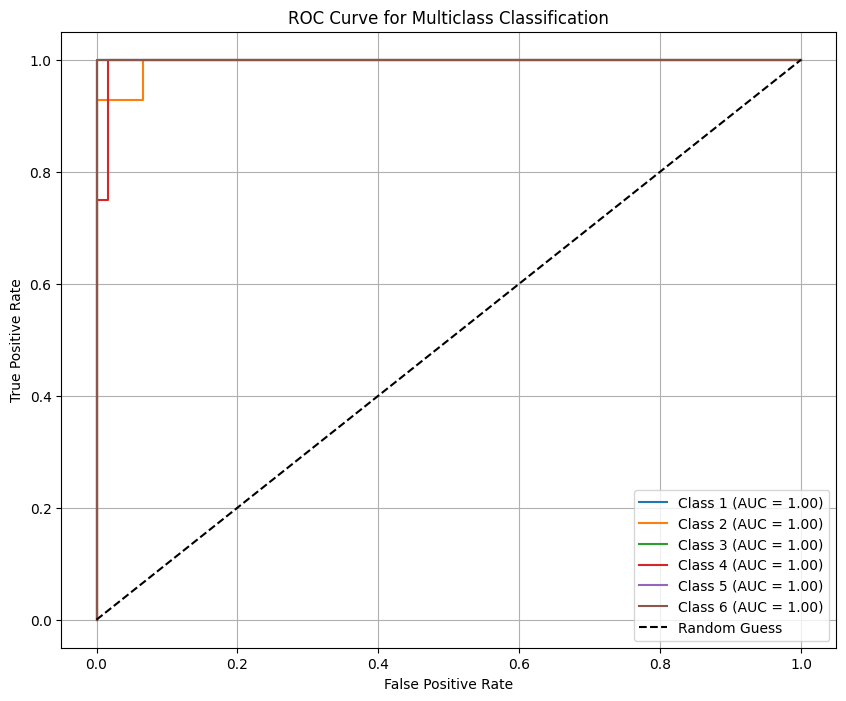

In [70]:
# find the AUCROC curve 
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])  # Replace with your classes
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_pred_prob = LR.predict_proba(x_test)  # Assumes LR supports predict_proba()

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## SVM:- Support Vectore Machine

In [71]:
from sklearn.svm import SVC # call SVC algorithm
SVM = SVC(kernel="linear")
SVM.fit(x_train,y_train) # train the model

SVC(kernel='linear')

In [72]:
y_svm = SVM.predict(x_test) # predict the data

In [637]:
a2 = accuracy_score(y_test,y_svm)
a2

0.9594594594594594

In [74]:
y_tsvm = SVM.predict(x_train)

In [155]:
t2 = accuracy_score(y_train,y_tsvm)
t2

0.9965753424657534

In [654]:
f2 = f1_score(y_test,y_svm,average="weighted")
f2

0.9596510537687009

In [656]:
r2 = recall_score(y_test,y_svm,average="weighted")
r2

0.9594594594594594

In [657]:
p2 = precision_score(y_test,y_svm,average="weighted")
p2

0.9633204633204632

In [77]:
print(classification_report(y_test,y_svm))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00        16
           4       0.86      1.00      0.92        12
           5       1.00      0.89      0.94         9
           6       1.00      0.88      0.93         8

    accuracy                           0.96        74
   macro avg       0.96      0.95      0.95        74
weighted avg       0.96      0.96      0.96        74



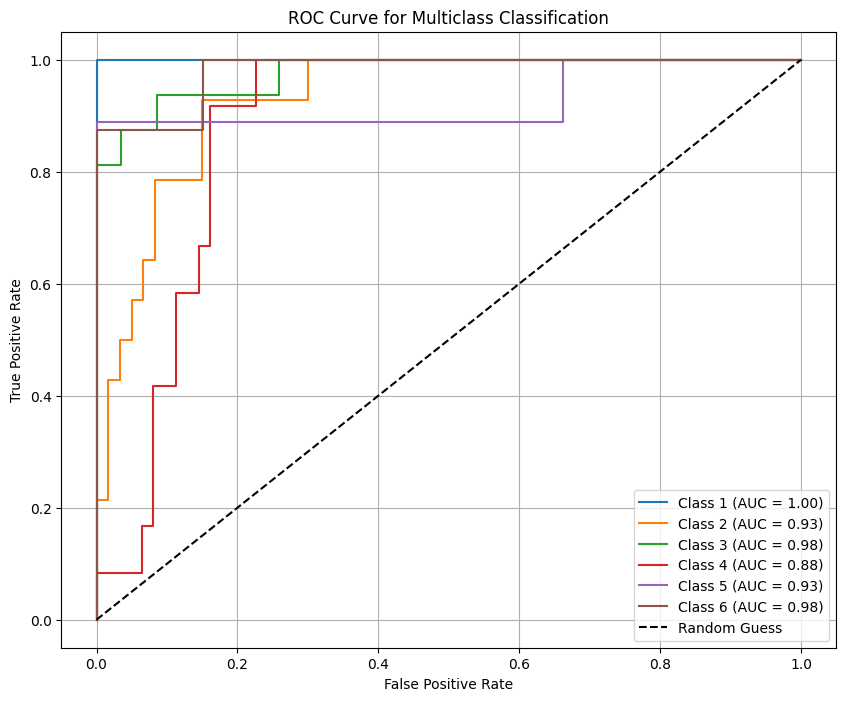

In [157]:
# find the AUCROC curve
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])  # Replace with your classes
n_classes = y_test_bin.shape[1]

# Initialize SVC with probability=True
SVM = SVC(probability=True, kernel='rbf')  # You can use a different kernel if needed

# Train the model
SVM.fit(x_train, y_train)

# Get predicted probabilities
a2 = SVM.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a2[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], a2[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## KNN :- K-Nearest Neighbour

In [84]:
from sklearn.neighbors import KNeighborsClassifier # call the KNN Algorithm
KNN = KNeighborsClassifier(n_neighbors=1,algorithm="ball_tree")
KNN.fit(x_train,y_train) # train the model

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

In [85]:
y_knn = KNN.predict(x_test) # predict the model

In [639]:
accuracy_score(y_test,y_knn)

0.8783783783783784

In [87]:
y_tknn = KNN.predict(x_train)

In [152]:
t3 = accuracy_score(y_train,y_tknn)
t3

1.0

In [658]:
f3 = f1_score(y_test,y_knn,average="weighted")
f3

0.8772743331566861

In [659]:
r3 = recall_score(y_test,y_knn,average="weighted")
r3

0.8783783783783784

In [660]:
p3 = precision_score(y_test,y_knn,average="weighted")
p3

0.8894894894894895

In [90]:
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.90      0.64      0.75        14
           3       0.89      1.00      0.94        16
           4       0.67      0.83      0.74        12
           5       1.00      0.89      0.94         9
           6       0.88      0.88      0.88         8

    accuracy                           0.88        74
   macro avg       0.89      0.87      0.87        74
weighted avg       0.89      0.88      0.88        74



In [201]:
# use the Hyperprameter of KNN ALgorithm
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

model2 = KNeighborsClassifier()
# Define parameters to tune
param_grid2 = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],   # Number of neighbors, odd values to avoid ties
    'weights': ['uniform', 'distance'],        # Weighting schemes
    'metric': ['euclidean', 'manhattan'],  # Distance metrics
    'p': [1, 2,4],                               # Parameter for Minkowski distance (p=1: Manhattan, p=2: Euclidean)
    'algorithm': ['ball_tree', 'kd_tree'],  # Algorithm for finding neighbors
    'leaf_size': [10, 20, 30, 40, 50,70],   # Leaf size for tree-based algorithms
}
# Perform grid search
grid_search2 = GridSearchCV(model2,param_grid2, cv=3, scoring='accuracy', n_jobs=-1)
grid_search2.fit(x_train, y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': [10, 20, 30, 40, 50, 70],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'p': [1, 2, 4], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [202]:
y_hknn = grid_search2.predict(x_test) # predict the model

In [640]:
a3 = accuracy_score(y_test,y_hknn)
a3

0.9324324324324325

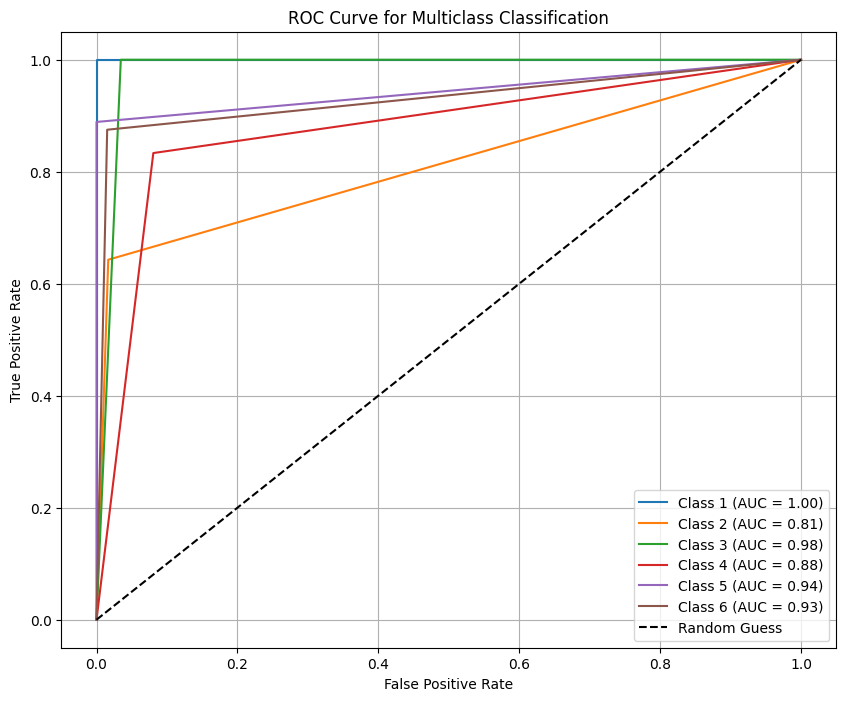

In [206]:
# find the AUCROC curve 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])  # Replace with your classes
n_classes = y_test_bin.shape[1]

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed

# Train the model
knn.fit(x_train, y_train)

# Get predicted probabilities
a3 = KNN.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a3[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], a3[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Desicion Tree Algorithm

In [91]:
from sklearn.tree import DecisionTreeClassifier # call the Desicion tree model
DT = DecisionTreeClassifier(criterion="entropy",max_depth=20,min_samples_split=7)
DT.fit(x_train,y_train) # train the model

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=7)

In [92]:
y_dt = DT.predict(x_test) # predict the model

In [641]:
a4 = accuracy_score(y_test,y_dt)
a4

0.9324324324324325

In [94]:
y_tdt = DT.predict(x_train)

In [160]:
t4 = accuracy_score(y_train,y_tdt)
t4

0.9794520547945206

In [661]:
f4 = f1_score(y_test,y_dt,average="weighted")
f4

0.9294931536310848

In [662]:
r4 = recall_score(y_test,y_dt,average="weighted")
r4

0.9324324324324325

In [663]:
p4 = precision_score(y_test,y_dt,average="weighted")
p4

0.9389398326898327

In [669]:
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       0.87      0.93      0.90        14
           3       1.00      0.94      0.97        16
           4       0.86      1.00      0.92        12
           5       1.00      1.00      1.00         9
           6       1.00      0.62      0.77         8

    accuracy                           0.93        74
   macro avg       0.94      0.92      0.92        74
weighted avg       0.94      0.93      0.93        74



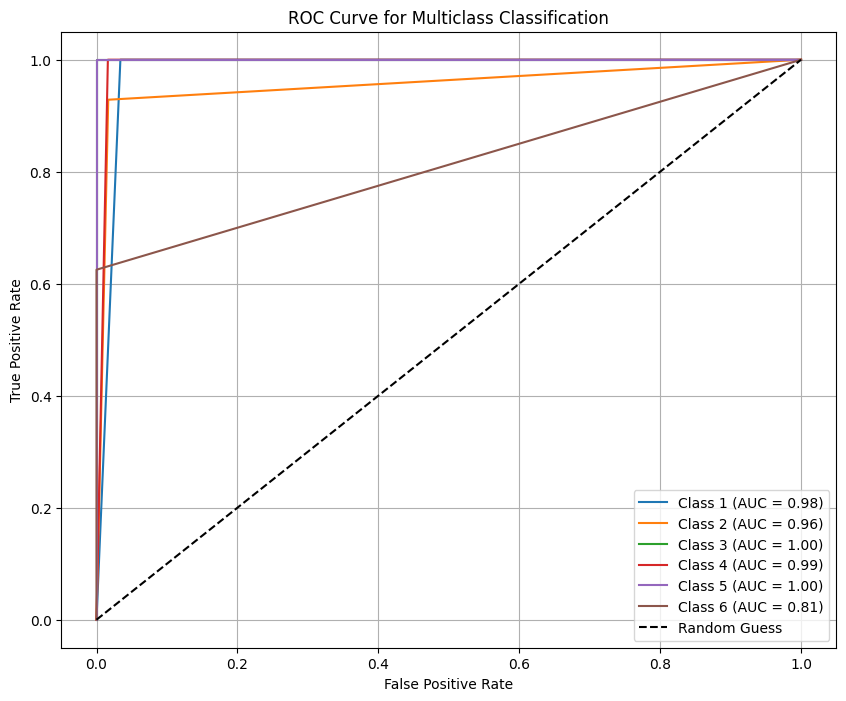

In [164]:
# find the AUCROC curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])  # Replace with your classes
n_classes = y_test_bin.shape[1]

# Initialize DecisionTreeClassifier
dt = DecisionTreeClassifier()  # You can tune hyperparameters as needed

# Train the model
dt.fit(x_train, y_train)

# Get predicted probabilities
a4 = dt.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a4[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], a4[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Baggin Algorithm

In [397]:
from sklearn.ensemble import BaggingClassifier # call the Bagging Model  
BG = BaggingClassifier(n_estimators=48,max_features=0.5,random_state=0,max_samples=0.1)
BG.fit(x_train,y_train) # train the model

BaggingClassifier(max_features=0.5, max_samples=0.1, n_estimators=48,
                  random_state=0)

In [398]:
y_bg = BG.predict(x_test) # predict the model

In [643]:
a5 = accuracy_score(y_test,y_bg)
a5

0.9324324324324325

In [400]:
y_tbg = BG.predict(x_train)

In [665]:
t5 = accuracy_score(y_train,y_tbg)
t5

0.9691780821917808

In [666]:
f5 = f1_score(y_test,y_bg,average="weighted")
f5

0.9260116971810519

In [670]:
r5 = recall_score(y_test,y_bg,average="weighted")
r5

0.9324324324324325

In [671]:
p5 = recall_score(y_test,y_bg,average="weighted")
p5

0.9324324324324325

In [104]:
print(classification_report(y_test,y_bg))

              precision    recall  f1-score   support

           1       0.88      1.00      0.94        15
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         9
           6       1.00      0.75      0.86         8

    accuracy                           0.97        74
   macro avg       0.98      0.96      0.97        74
weighted avg       0.98      0.97      0.97        74



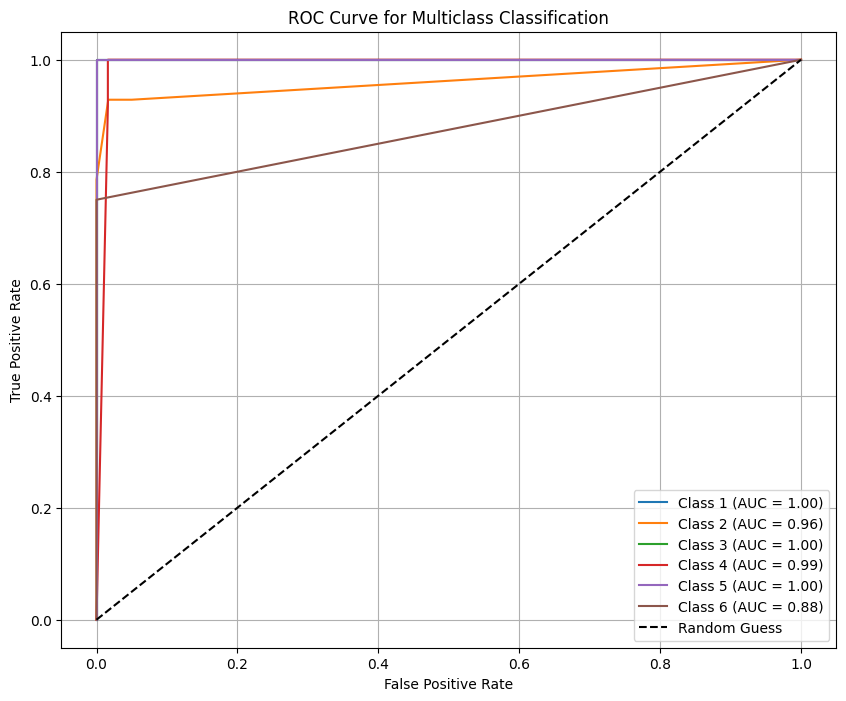

In [402]:
# find the AUCROC Curve 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])  # Replace with your classes
n_classes = y_test_bin.shape[1]

# Initialize BaggingClassifier with DecisionTreeClassifier as the base estimator
bagging = BaggingClassifier(
    n_estimators=10,  # Number of base estimators
    random_state=42
)

# Train the model
bagging.fit(x_train, y_train)

# Get predicted probabilities
a5 = bagging.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a5[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], a5[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Random Forest Algorithm

In [439]:
from sklearn.ensemble import RandomForestClassifier # call the Random Forest Algorithm
RM = RandomForestClassifier(n_estimators=40,max_features=0.3,random_state=69,max_samples=0.2)
RM.fit(x_train,y_train) # train the model

RandomForestClassifier(max_features=0.3, max_samples=0.2, n_estimators=40,
                       random_state=69)

In [440]:
y_rm = RM.predict(x_test) # predict the model

In [644]:
a6 = accuracy_score(y_test,y_rm)
a6

0.972972972972973

In [442]:
y_trm = RM.predict(x_train)

In [571]:
t6 = accuracy_score(y_train,y_trm)
t6

0.9863013698630136

In [672]:
f6 = f1_score(y_test,y_rm,average="weighted")
f6

0.9727555141348245

In [675]:
r6 = recall_score(y_test,y_rm,average="weighted")
r6

0.972972972972973

In [674]:
p6 = precision_score(y_test,y_rm,average="weighted")
p6

0.9747184684684684

In [111]:
print(classification_report(y_test,y_rm))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        16
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00         9
           6       1.00      0.88      0.93         8

    accuracy                           0.97        74
   macro avg       0.98      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74



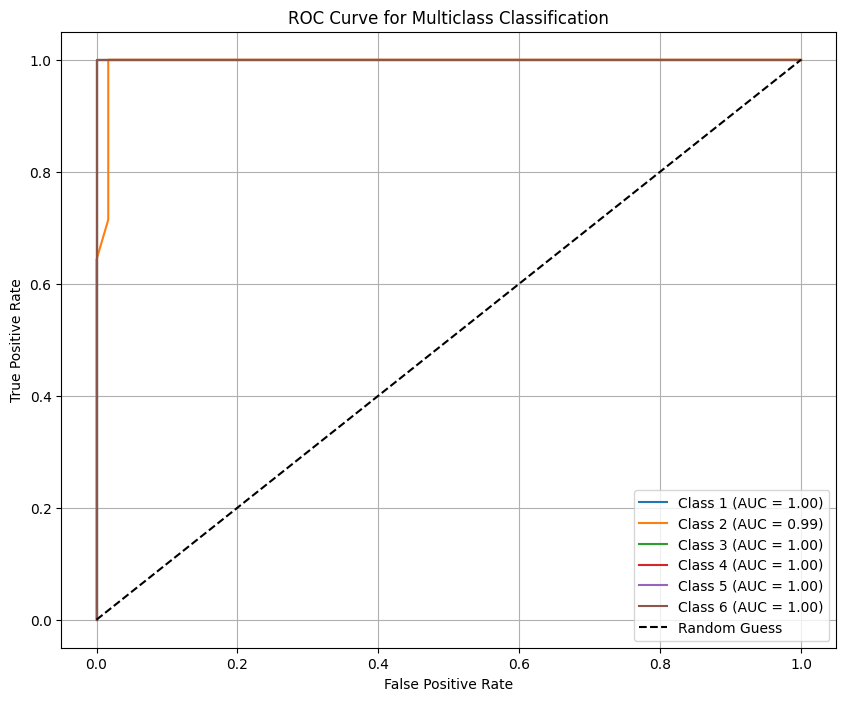

In [572]:
# find the AUCROC curve
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
random_forest = RandomForestClassifier(
    n_estimators=10,  # Number of trees in the forest
    random_state=42
)

# Train the model
random_forest.fit(x_train, y_train)

# Get predicted probabilities
a5 = random_forest.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a5[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], a5[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Gradiant Boosting Algorithm 

In [561]:
from sklearn.ensemble import GradientBoostingClassifier # call the Gradiant boosting Algorithm
GB = GradientBoostingClassifier(learning_rate=0.03,n_estimators=90,max_depth=1)
GB.fit(x_train,y_train) # train the model

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.03,
                           max_depth=1, n_estimators=90)

In [562]:
y_gb = GB.predict(x_test) # predict the test data

In [645]:
a7 = accuracy_score(y_test,y_gb)
a7

0.9459459459459459

In [564]:
y_tgb = GB.predict(x_train)

In [574]:
t7 = accuracy_score(y_train,y_tgb)
t7

0.9726027397260274

In [676]:
f7 = f1_score(y_test,y_gb,average="weighted")
f7

0.9450549450549451

In [678]:
r7 = recall_score(y_test,y_gb,average="weighted")
r7

0.9459459459459459

In [679]:
p7 = precision_score(y_test,y_gb,average="weighted")
p7

0.9506515444015443

In [118]:
print(classification_report(y_test,y_gb))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        16
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00         9
           6       1.00      0.88      0.93         8

    accuracy                           0.97        74
   macro avg       0.98      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74



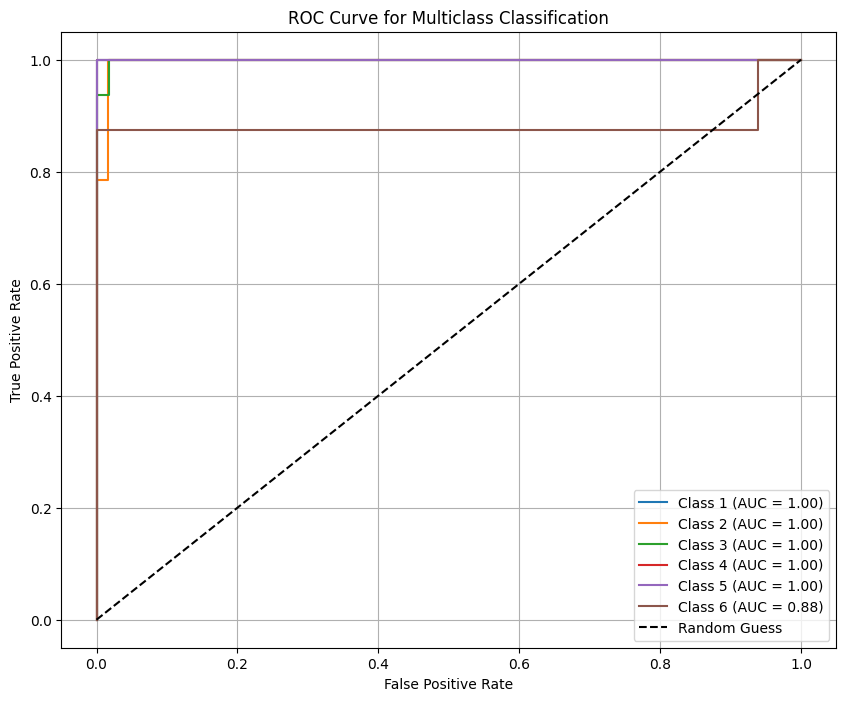

In [575]:
# find the AUCROC curve
from sklearn.ensemble import GradientBoostingClassifier

# Initialize GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(
    n_estimators=10,  # Number of boosting stages
    random_state=42
)

# Train the model
gradient_boosting.fit(x_train, y_train)

# Get predicted probabilities
a7 = gradient_boosting.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a7[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], a7[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## XGBoost Algorithm

In [119]:
# Remap the class labels to start from 0
y_train_mapped = y_train - 1
y_test_mapped = y_test - 1

In [579]:
from xgboost import XGBClassifier # call the XGBoost Algorithm
xgb = XGBClassifier(n_estimators=10,  # Number of boosting stages
    use_label_encoder=False,  # Avoid label encoding warning
    random_state=42,
    eval_metric="mlogloss")
xgb.fit(x_train,y_train_mapped) # train the model

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:09:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [580]:
y_xgb = xgb.predict(x_test) # predict the test data

In [646]:
a8 = accuracy_score(y_test_mapped,y_xgb)
a8

0.9594594594594594

In [582]:
y_txgb = xgb.predict(x_train)

In [616]:
t8 = accuracy_score(y_train_mapped,y_txgb)
t8

1.0

In [680]:
f8 = f1_score(y_test_mapped,y_xgb,average="weighted")
f8

0.9580171876946071

In [681]:
r8 = recall_score(y_test_mapped,y_xgb,average="weighted")
r8

0.9594594594594594

In [682]:
p8 = precision_score(y_test_mapped,y_xgb,average="weighted")
p8

0.9613435550935552

In [585]:
print(classification_report(y_test_mapped,y_xgb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        16
           3       0.92      1.00      0.96        12
           4       1.00      1.00      1.00         9
           5       1.00      0.75      0.86         8

    accuracy                           0.96        74
   macro avg       0.96      0.95      0.95        74
weighted avg       0.96      0.96      0.96        74



## Navin Baise Algorithm

In [127]:
from sklearn.naive_bayes import BernoulliNB # use the Navin Baise Algorithm
NB = BernoulliNB()
NB.fit(x_train,y_train) # train the model

BernoulliNB()

In [128]:
y_nb = NB.predict(x_test) # predict the test data

In [647]:
a9 = accuracy_score(y_test,y_nb)
a9

0.9459459459459459

In [130]:
y_tnb = NB.predict(x_train)

In [618]:
t9 = accuracy_score(y_train,y_tnb)
t9

0.9828767123287672

In [683]:
f9 = f1_score(y_test,y_nb,average="weighted")
f9

0.9456894141104668

In [685]:
r9 = recall_score(y_test,y_nb,average="weighted")
r9

0.9459459459459459

In [686]:
p9 = precision_score(y_test,y_nb,average="weighted")
p9

0.9501188001188001

In [133]:
print(classification_report(y_test,y_nb))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.92      0.86      0.89        14
           3       1.00      0.88      0.93        16
           4       0.86      1.00      0.92        12
           5       0.90      1.00      0.95         9
           6       1.00      1.00      1.00         8

    accuracy                           0.95        74
   macro avg       0.95      0.96      0.95        74
weighted avg       0.95      0.95      0.95        74



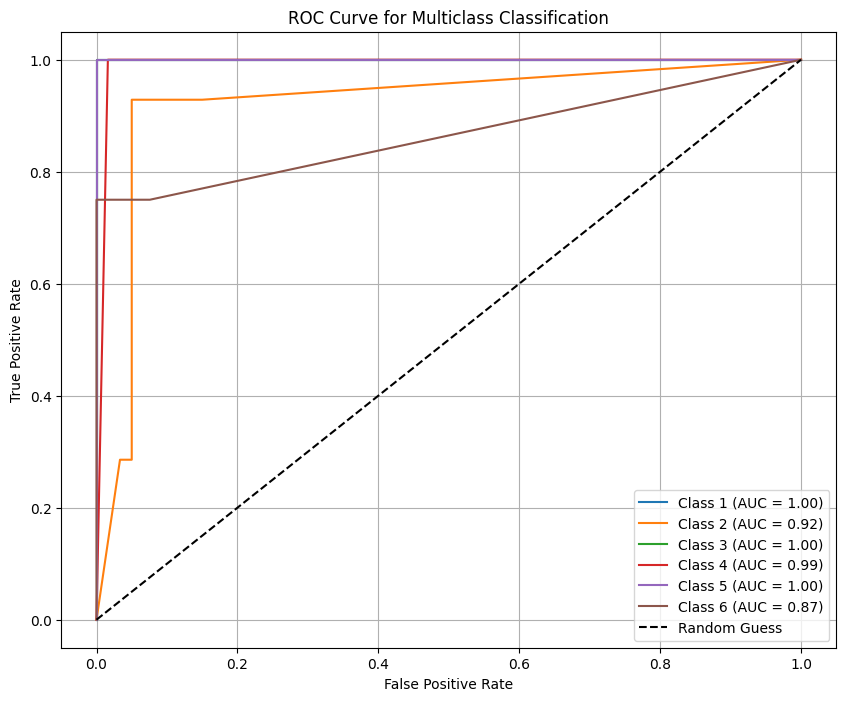

In [619]:
# find hte AUCROC curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])  # Replace with your classes
n_classes = y_test_bin.shape[1]

# Initialize Gaussian Naive Bayes
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(x_train, y_train)

# Get predicted probabilities
a9 = naive_bayes.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a9[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], a9[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Adaboosting Algorithm

In [134]:
from sklearn.ensemble import AdaBoostClassifier # use the Adaboosting Algrithm
AD = AdaBoostClassifier(n_estimators=100,learning_rate=0.011,random_state=40)
AD.fit(x_train,y_train) # train the model

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.011, n_estimators=100, random_state=40)

In [135]:
y_ad = AD.predict(x_test) # predict the test data

In [648]:
a10 = accuracy_score(y_test,y_ad)
a10

0.9324324324324325

In [621]:
y_tad = AD.predict(x_train)

In [622]:
t10 = accuracy_score(y_train,y_tad)
t10

0.9657534246575342

In [687]:
f10 = f1_score(y_test,y_ad,average="weighted")
f10

0.92982674982675

In [688]:
r10 = recall_score(y_test,y_ad,average="weighted")
r10

0.9324324324324325

In [689]:
p10 = precision_score(y_test,y_ad,average="weighted")
p10

0.9393840956340956

In [699]:
print(classification_report(y_test,y_ad))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       0.81      0.93      0.87        14
           3       1.00      0.94      0.97        16
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00         9
           6       1.00      0.62      0.77         8

    accuracy                           0.93        74
   macro avg       0.95      0.92      0.92        74
weighted avg       0.94      0.93      0.93        74



C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


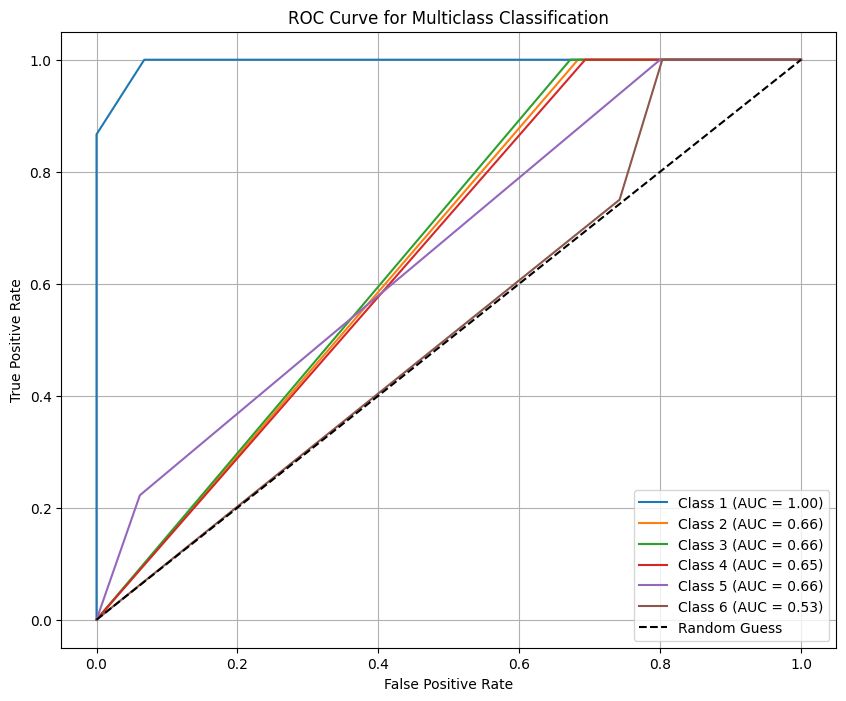

In [623]:
# find the AUCROC curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])  # Replace with your classes
n_classes = y_test_bin.shape[1]

# Initialize AdaBoostClassifier
adaboost = AdaBoostClassifier(
    n_estimators=10,  # Number of boosting stages
    random_state=42
)

# Train the model
adaboost.fit(x_train, y_train)

# Get predicted probabilities
a10 = adaboost.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a10[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], a10[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## ANN:- Artificial Neural Network

In [141]:
from sklearn.neural_network import MLPClassifier # use the ANN Model 
ANN = MLPClassifier()
ANN.fit(x_train,y_train) # train the model

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [142]:
y_ann = ANN.predict(x_test) # predict the test data

In [649]:
a11 = accuracy_score(y_test,y_ann)
a11

0.9864864864864865

In [144]:
y_tann = ANN.predict(x_train)

In [626]:
t11 = accuracy_score(y_train,y_tann)
t11

0.9965753424657534

In [690]:
f11 = f1_score(y_test,y_ann,average="weighted")
f11

0.9865065065065064

In [691]:
r11 = recall_score(y_test,y_ann,average="weighted")
r11

0.9864864864864865

In [692]:
p11 = precision_score(y_test,y_ann,average="weighted")
p11

0.9875259875259875

In [149]:
confusion_matrix(y_test,y_ann)

array([[15,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  1,  0,  0],
       [ 0,  0, 16,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  8]], dtype=int64)

In [150]:
print(classification_report(y_test,y_ann))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        16
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         8

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2974 - loss: 1.6986
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4674 - loss: 1.2539 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6447 - loss: 0.9580 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7352 - loss: 0.8363 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7789 - loss: 0.6930 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8265 - loss: 0.6100
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8654 - loss: 0.4998
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8847 - loss: 0.4237
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9229 - loss: 0.3705 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9207 - loss: 0.3099 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


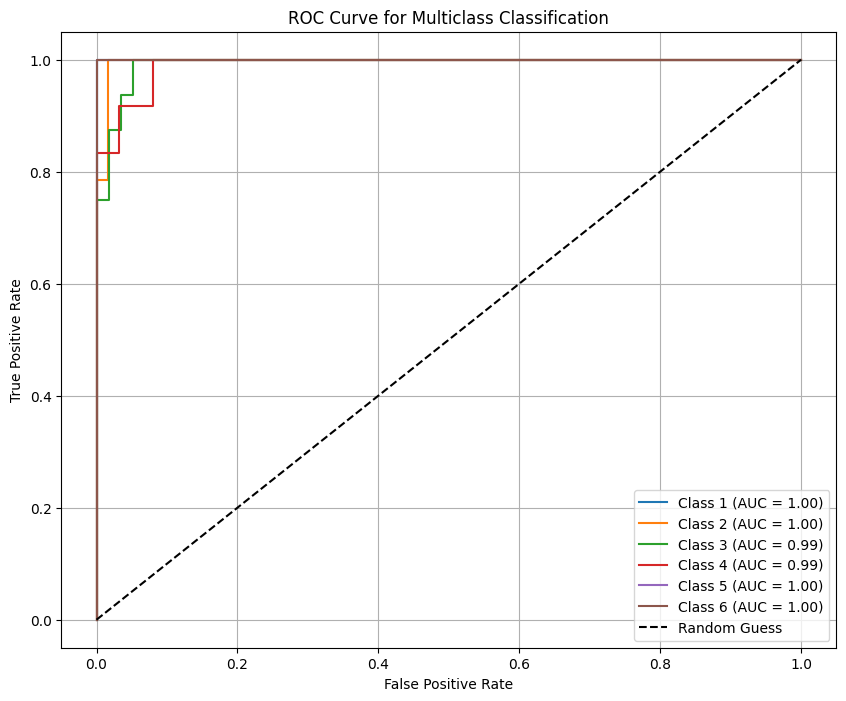

In [627]:
# find the AUCROC curve 
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Ensure labels are 0-based indexed
y_train_bin = to_categorical(y_train - 1, num_classes=6)
y_test_bin = to_categorical(y_test - 1, num_classes=6)

# Initialize ANN model
model = Sequential([
    Dense(128, activation='relu', input_dim=x_train.shape[1]),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(6, activation='softmax')  # Output layer (softmax for multiclass classification)
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_bin, epochs=10, batch_size=32, verbose=1)

# Get predicted probabilities
a11 = model.predict(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a11[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], a11[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Cross Validation

In [628]:
from sklearn.model_selection import cross_val_score # use the cross vaidation technique
score = cross_val_score(ANN,x,y,cv=3,scoring="accuracy") # use the ANN model
score

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0.95081967, 0.95081967, 0.94262295])

## Predict The Model

In [629]:
import pickle # use for save the model
with open("Skin_Disorder","wb") as f:
    pickle.dump(ANN,f)

In [630]:
with open("Skin_Disorder","rb") as f: # call the model for predict the data
    file = pickle.load(f)

In [631]:
file 

MLPClassifier()

In [700]:
x.head() # showning the top 5 data

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   follicular_papules  oral_mucosal_involvement  knee_and_elbow_involvement  \
0                   0                         0                           1   
1                   0                         0                           1   
2                   0                         3                           0   
3                   0                         0                           3   
4                   0                         2                           0   

   scalp_involvement  family_history  eosinophils_in_the_infiltrate  \
0                  0               0                              0   
1                  1               1                              0   
2                  0               0                              0   
3                  2               0                              0   
4                  0               0                              0   

   PNL_infiltrate  fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  \
0               0                                 0           3           2   
1               1                                 0           1           2   
2               0                                 0           1           2   
3               3                                 0           0           2   
4               0                                 0           1           2   

   hyperkeratosis  parakeratosis  clubbing_of_the_rete_ridges  \
0               0              0                            0   
1               0              2                            2   
2               0              2                            0   
3               0              3                            2   
4               0              0                            0   

   elongation_of_the_rete_ridges  thinning_of_the_suprapapillary_epidermis  \
0                              0                                         0   
1                              2                                         2   
2                              0                                         0   
3                              2                                         2   
4                              0                                         0   

   spongiform_pustule  munro_microabcess  disappearance_of_the_granular_layer  \
0                   0                  0                                    0   
1                   2                  1                                    0   
2                   0                  0                                    0   
3                   2                  0                                    3   
4                   0                  0                                    2   

   spongiosis  follicular_horn_plug  inflammatory_monoluclear_inflitrate  Age  
0           3                     0                                    1   55  
1           0                     0                                    1    8  
2           3                     0                                    2   26  
3           0                     0                                    3   40  
4           2                     0                                    2   45

In [633]:
y.head() # showning the top 5 data

0    2
1    1
2    3
3    1
4    3
Name: class, dtype: int64

In [634]:
# predict the data
file.predict([[2,	2,	0,	3,	0,	0,	0,	1,	0,	0,	0,	0,	0,	3	,2,	0,	0,	0,	0	,0,	0,	0,	0,	3,	0,	1,	55]])

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

## Model Report

In [693]:
# check the all algorithm model perforamnce in table form
# check the Model name, accuracy score,recall score,precision score,f1 score
score = pd.DataFrame({"Model":["LogisticRegression","SVM","KNN Algorithm","DecisionTreeRegressor","Bagging","RandomForestRegressor","GradiantBoosting","XGBRegressor","Naive Bayes Algorithm","AdaBoosting","ANN_MLPRegressor"],
                     "Testing_Accuracy":[y_pred_prob*100,a2*100,a3*100,a4*100,a5*100,a6*100,a7*100,a8*100,a9*100,a10*100,a11*100],
                     "Traning_Accuracy":[t1*100,t2*100,t3*100,t4*100,t5*100,t6*100,t7*100,t8*100,t9*100,t10*100,t11*100],
                     "F1_Score":[f1*100,f2*100,f3*100,f4*100,f5*100,f6*100,f7*100,f8*100,f9*100,f10*100,f11*100],
                     "Recall_Score":[r1*100,r2*100,r3*100,r4*100,r5*100,r6*100,r7*100,r8*100,r9*100,r10*100,r11*100],
                     "Precision_Score":[p1*100,p2*100,p3*100,p4*100,p5*100,p6*100,p7*100,p8*100,p9*100,p10*100,p11*100]})
score

Model  Testing_Accuracy  Traning_Accuracy   F1_Score  \
0      LogisticRegression         98.648649         98.972603  98.650651   
1                     SVM         95.945946         99.657534  95.965105   
2           KNN Algorithm         93.243243        100.000000  87.727433   
3   DecisionTreeRegressor         93.243243         97.945205  92.949315   
4                 Bagging         93.243243         96.917808  92.601170   
5   RandomForestRegressor         97.297297         98.630137  97.275551   
6        GradiantBoosting         94.594595         97.260274  94.505495   
7            XGBRegressor         95.945946        100.000000  95.801719   
8   Naive Bayes Algorithm         94.594595         98.287671  94.568941   
9             AdaBoosting         93.243243         96.575342  92.982675   
10       ANN_MLPRegressor         98.648649         99.657534  98.650651   

    Recall_Score  Precision_Score  
0      98.648649        98.752599  
1      95.945946        96.332046  
2      87.837838        88.948949  
3      93.243243        93.893983  
4      93.243243        93.243243  
5      97.297297        97.471847  
6      94.594595        95.065154  
7      95.945946        96.134356  
8      94.594595        95.011880  
9      93.243243        93.938410  
10     98.648649        98.752599

                                                                ! Thank You !

**Insights:-**
* Here ANN Algorithm is show the high accuracy is 98.94 in testing data and traning data 99.95 accuracy show and it is show the Genralized model.